# Capstone Project

Analyzing Crime Occurance in Los Angeles From 2010 to Present 


In [1]:
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import rc 
from datetime import datetime as dt 
from matplotlib.font_manager import FontProperties
import seaborn as sns 
import numpy as np
%matplotlib inline 

In [3]:
# Setting a seaborn style for all graphs 
sns.set()

In [4]:
# Loading the data 
df=pd.read_csv('/Users/dasha/Downloads/Crime_Data_from_2010_to_Present.csv',parse_dates=[['Date Occurred','Time Occurred']])

In [6]:
# Checking the types of variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805537 entries, 0 to 1805536
Data columns (total 25 columns):
Date Occurred_Time Occurred    datetime64[ns]
DR Number                      int64
Date Reported                  object
Area ID                        int64
Area Name                      object
Reporting District             int64
Crime Code                     int64
Crime Code Description         object
MO Codes                       object
Victim Age                     float64
Victim Sex                     object
Victim Descent                 object
Premise Code                   float64
Premise Description            object
Weapon Used Code               float64
Weapon Description             object
Status Code                    object
Status Description             object
Crime Code 1                   float64
Crime Code 2                   float64
Crime Code 3                   float64
Crime Code 4                   float64
Address                        object
Cr

In [5]:
# Dropping unnecessary columns 
df=df.drop(columns=['DR Number','Date Reported','Reporting District','MO Codes','Crime Code','Area ID','Premise Code','Weapon Used Code','Status Code','Crime Code 1','Crime Code 2','Crime Code 3','Crime Code 4','Address','Cross Street'])

In [6]:
# Splitting datatime object into separate date and time columns (For efficient use later...)
df['Date Occurred']=df['Date Occurred_Time Occurred'].dt.date
df['Time Occurred']=df['Date Occurred_Time Occurred'].dt.time

In [10]:
# Building a time classifier column 

morning_start=pd.to_datetime('06:00:00').time()
morning_end=pd.to_datetime('12:00:00').time()
afternoon_end=pd.to_datetime('17:00:00').time()
evening_end=pd.to_datetime('22:00:00').time()

def time_categorizer(time_str):
    if (time_str>morning_start) & (time_str<=morning_end):
        return "Morning"
    elif (time_str>morning_end) & (time_str<=afternoon_end):
        return 'Afternoon'
    elif (time_str>afternoon_end) & (time_str<=evening_end):
        return 'Evening'
    else: 
        return 'Night'

df['Time Code']=df['Time Occurred'].apply(time_categorizer)

In [12]:
# Looking at missing values
num_row=df.shape[0]
print(num_row)
vic_age=df['Victim Age'].isna().sum()
vic_sex=df['Victim Sex'].isna().sum()
vic_des=df['Victim Descent'].isna().sum()
vic_total=df[['Victim Age','Victim Sex','Victim Descent']].isna().sum()

1805537


In [13]:
print('Victim Age Null = ',num_row/vic_age)
print('Victim Sex Null = ',num_row/vic_sex)
print('Victim Descent Null = ',num_row/vic_des)
#NaN values in Victim Age are 1/12th of the total data 
#NaN values in Victim Sex are 1/10th of the total data 
#NaN values in Victim Descent are 1/10th of the total data 
#NaN of 3 groups comprise approx. 1/6 of total data - will keep the NaN values since 
#some of that data will be useful for other calculations 

Victim Age Null =  12.569263541876962
Victim Sex Null =  10.856781215237065
Victim Descent Null =  10.854170549159878


In [14]:
df['Victim Age'].fillna('Missing',inplace=True)
df['Victim Sex'].fillna('Missing',inplace=True)
df['Victim Descent'].fillna('Missing',inplace=True)

In [15]:
# Looking at labels in 'Weapon Description' column 
df['Weapon Description'].value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    365301
VERBAL THREAT                                      49983
UNKNOWN WEAPON/OTHER WEAPON                        47627
HAND GUN                                           28882
SEMI-AUTOMATIC PISTOL                              11332
KNIFE WITH BLADE 6INCHES OR LESS                   10783
OTHER KNIFE                                         7986
UNKNOWN FIREARM                                     6742
VEHICLE                                             6163
REVOLVER                                            5061
BOTTLE                                              4309
STICK                                               3772
ROCK/THROWN OBJECT                                  3771
BLUNT INSTRUMENT                                    3740
CLUB/BAT                                            3660
FOLDING KNIFE                                       3576
KITCHEN KNIFE                                       3220
MACE/PEPPER SPRAY              

In [16]:
# How much data is missing in 'Weapoin Description'
(df['Weapon Description'].isna().sum())/num_row*100

66.70491936747905

In [17]:
# Since the column is missing more than 66% of its data....
df.drop(columns='Weapon Description',inplace=True)

In [19]:
# Now 'Premise Description'...
df['Premise Description'].unique()

array(['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'STREET',
       'SINGLE FAMILY DWELLING', 'PARKING LOT', 'OTHER BUSINESS',
       'DEPARTMENT STORE', 'SIDEWALK', 'OTHER STORE',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'HOSPITAL', 'POST OFFICE',
       'VEHICLE, PASSENGER/TRUCK', 'MARKET', 'JEWELRY STORE',
       'RESTAURANT/FAST FOOD', 'OTHER PREMISE', 'THEATRE/MOVIE',
       'OTHER RESIDENCE', 'PROJECT/TENEMENT/PUBLIC HOUSING',
       'BAR/COCKTAIL/NIGHTCLUB', 'MEDICAL/DENTAL OFFICES', 'VACANT LOT',
       'DRIVEWAY', 'POLICE FACILITY', 'FREEWAY', 'HOTEL',
       'CLOTHING STORE', 'DRUG STORE', 'PARK/PLAYGROUND',
       'CELL PHONE STORE', 'HEALTH SPA/GYM', 'OTHER/OUTSIDE',
       'HARDWARE/BUILDING SUPPLY', 'ALLEY', 'TOBACCO SHOP', 'BUS STOP',
       'SWAP MEET', 'MINI-MART', 'STORAGE SHED', 'GARAGE/CARPORT',
       'HIGH SCHOOL', 'PUBLIC STORAGE', 'PARKING UNDERGROUND/BUILDING',
       'OFFICE BUILDING/OFFICE', 'WAREHOUSE', 'SKATING RINK*',
       'CONVENTION CENTER', 'BANK

In [20]:
(df['Premise Description'].isna().sum())/num_row*100

0.17933722765027799

In [21]:
# Premise Description data is well populated and could be used in calculations 
# Will drop NaN values since number of missing data is insignificant 

In [22]:
df.dropna(subset=['Premise Description'],how='any',inplace=True)

In [23]:
# Building a broad, but more narrow classification of crime labels than in the original dataframe ....

Crime={'Motor Vehicle and Transportation-Related Crime':['RECKLESS DRIVING',
                                                'DRIVING WITHOUT OWNER CONSENT (DWOC)',
                                                  'FAILURE TO YIELD','TRAIN WRECKING'],
    'Sex-Related Crime':['INTIMATE PARTNER - SIMPLE ASSAULT',
                            'INTIMATE PARTNER - AGGRAVATED ASSAULT',
                            'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02',
                            'INDECENT EXPOSURE',
                            'RAPE, FORCIBLE',
                            'SEXUAL PENTRATION WITH A FOREIGN OBJECT',
                            'LETTERS, LEWD',
                            'RAPE, ATTEMPTED',
                            'LEWD CONDUCT',
                            'BATTERY WITH SEXUAL CONTACT',
                            'PIMPING',
                            'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065',
                            'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
                            'PEEPING TOM',
                            'SEX, UNLAWFUL',
                            'ORAL COPULATION',
                            'PANDERING',
                            'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
                            'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059',
                            'SEXUAL PENETRATION W/FOREIGN OBJECT',
                            'LEWD/LASCIVIOUS ACTS WITH CHILD',
                            'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
                            'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
                            'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH','BIGAMY'],
    'Human Trafficking':['HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
                            'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'],
    'Vandalism and Property Damage':['VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                        'TELEPHONE PROPERTY - DAMAGE',
                                        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114'],
    'Kidnapping':['KIDNAPPING',
                     'CHILD STEALING',
                     'KIDNAPPING - GRAND ATTEMPT'],
    'Criminal Threats':['CRIMINAL THREATS - NO WEAPON DISPLAYED',
                           'STALKING','BOMB SCARE','BRANDISH WEAPON',
                           'THREATENING PHONE CALLS/LETTERS'],
    'Homocide':['CRIMINAL HOMICIDE',
                   'LYNCHING - ATTEMPTED',
                   'LYNCHING',
                   'MANSLAUGHTER, NEGLIGENT'],
    'Robbery and Theft':['THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
                            'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
                            'THEFT PLAIN - PETTY ($950 & UNDER)',
                            'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
                            'BIKE - STOLEN',
                            'ROBBERY',
                            'ATTEMPTED ROBBERY',
                            'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
                            'BURGLARY FROM VEHICLE',
                            'BURGLARY','SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
                            'THEFT, PERSON',
                            'EXTORTION',
                            'BURGLARY FROM VEHICLE, ATTEMPTED',
                            'THEFT PLAIN - ATTEMPT',
                            'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
                            'BURGLARY, ATTEMPTED',
                            'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
                            'THEFT OF IDENTITY',
                            'BUNCO, GRAND THEFT',
                            'PURSE SNATCHING',
                            'PROWLER',
                            'VEHICLE - ATTEMPT STOLEN',
                            'BIKE - ATTEMPTED STOLEN',
                            'THEFT FROM PERSON - ATTEMPT',
                            'PICKPOCKET',
                            'VEHICLE - STOLEN','DISHONEST EMPLOYEE - PETTY THEFT',
                            'BUNCO, ATTEMPT',
                            'BUNCO, PETTY THEFT',
                            'SHOPLIFTING - ATTEMPT',
                            'PICKPOCKET, ATTEMPT',
                            'PURSE SNATCHING - ATTEMPT',
                            'THEFT FROM MOTOR VEHICLE - ATTEMPT',
                            'DISHONEST EMPLOYEE - GRAND THEFT',
                            'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
                            'BOAT - STOLEN','TILL TAP - PETTY ($950 & UNDER)',
                            'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
                            'GRAND THEFT / AUTO REPAIR',
                            'PETTY THEFT - AUTO REPAIR',
                            'TILL TAP - ATTEMPT',
                            'TILL TAP - GRAND THEFT ($950.01 & OVER)',
                            'DRUNK ROLL - ATTEMPT','THEFT, COIN MACHINE - ATTEMPT',
                            'DISHONEST EMPLOYEE ATTEMPTED THEFT','DRUNK ROLL','EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)'],
    'Fraud and Bribery':['COUNTERFEIT','DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
                         'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
                         'CREDIT CARDS, FRAUD USE ($950 & UNDER',
                         'DOCUMENT WORTHLESS ($200.01 & OVER)',
                         'BRIBERY',
                         'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
                         'GRAND THEFT / INSURANCE FRAUD','DOCUMENT WORTHLESS ($200 & UNDER)',
                         'DOCUMENT FORGERY / STOLEN FELONY'],
    'Assault':['BATTERY - SIMPLE ASSAULT',
               'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
               'OTHER ASSAULT',
               'INTIMATE PARTNER - AGGRAVATED ASSAULT',
               'SHOTS FIRED AT INHABITED DWELLING',
               'BATTERY POLICE (SIMPLE)',
               'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
               'BATTERY ON A FIREFIGHTER',
               'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
               'THROWING OBJECT AT MOVING VEHICLE','DISCHARGE FIREARMS/SHOTS FIRED'],
    'Violation of Orders or Resisting Arrest':['RESISTING ARREST',
                                               'VIOLATION OF COURT ORDER',
                                               'VIOLATION OF RESTRAINING ORDER',
                                               'VIOLATION OF TEMPORARY RESTRAINING ORDER',
                                               'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
                                               'CONTEMPT OF COURT'],
    'Other':['OTHER MISCELLANEOUS CRIME',
             'DISTURBING THE PEACE',
             'CRUELTY TO ANIMALS',
            'UNAUTHORIZED COMPUTER ACCESS',
             'ILLEGAL DUMPING',
             'FALSE POLICE REPORT',
             'CONTRIBUTING',
             'DISRUPT SCHOOL',
             'BLOCKING DOOR INDUCTION CENTER',
             'TRESPASSING',
             'nan',
             'FALSE IMPRISONMENT',
             'CONSPIRACY',
            'ABORTION/ILLEGAL',
            'ARSON'], 
    'Weapon possession/Bombing':['WEAPONS POSSESSION/BOMBING'],
    'Riots and Disruption of Peace':['INCITING A RIOT', 
                                        'FAILURE TO DISPERSE'],
    'Child-Related Crime':['CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                           'CHILD NEGLECT (SEE 300 W.I.C.)',
                           'CHILD ANNOYING (17YRS & UNDER)',
                           'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060',
                           'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                           'CHILD ABANDONMENT','CHILD PORNOGRAPHY',
                           'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'],
    'Unlawful Sales':['DRUGS, TO A MINOR','REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)0132',
                      'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)']}

In [24]:
# Building a even more narrow classification for crime labels (compared to above)...

crime_detailed={'Reckless Driving':['RECKLESS DRIVING',
                                    'FAILURE TO YIELD',
                                    'TRAIN WRECKING'],
                'Driving Without Owner Consent':['DRIVING WITHOUT OWNER CONSENT (DWOC)'],
                'Rape and Sexual Assault/Battery':['INTIMATE PARTNER - SIMPLE ASSAULT',
                                                   'INTIMATE PARTNER - AGGRAVATED ASSAULT',
                                                   'BATTERY WITH SEXUAL CONTACT',
                                                   'RAPE, ATTEMPTED',
                                                   'RAPE, FORCIBLE'],
                'Sodomy':['SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02',
                          'ORAL COPULATION',
                          'SEXUAL PENTRATION WITH A FOREIGN OBJECT',
                          'SEXUAL PENETRATION W/FOREIGN OBJECT',
                          'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH'],
                'Indecency/Lewd Conduct':['INDECENT EXPOSURE',
                                          'LETTERS, LEWD',
                                          'LEWD CONDUCT',
                                          'PEEPING TOM',
                                          'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD'],
                'Prostitution':['PIMPING'],
                'Unlawful Sex':['SEX, UNLAWFUL',
                                'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059',
                                'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ'],
                'Other Sexual Crime':['BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065',
                                      'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
                                      'PANDERING',
                                      'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)','BIGAMY'], 
                'Human Trafficking':['HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
                                     'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'],
                'Vandalism and Property Damage':['VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                                 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                                 'TELEPHONE PROPERTY - DAMAGE',
                                                 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114'],
                'Kidnapping':['KIDNAPPING',
                              'CHILD STEALING',
                              'KIDNAPPING - GRAND ATTEMPT'],
                'Criminal Threats w/o Weapon':['CRIMINAL THREATS - NO WEAPON DISPLAYED'],
                'Criminal Threats w/Weapon':['BRANDISH WEAPON'],
                'Harassment':['STALKING',
                              'THREATENING PHONE CALLS/LETTERS'],
                'Homocide':['CRIMINAL HOMICIDE',
                            'LYNCHING - ATTEMPTED',
                            'LYNCHING',
                            'MANSLAUGHTER, NEGLIGENT'],
                'Theft From a Person':['THEFT, PERSON','THEFT FROM PERSON - ATTEMPT'],
                'Shoplifting':['SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
                               'SHOPLIFTING - ATTEMPT',
                               'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)'],
                'Theft/Burglary From a Vehicle':['THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
                                                 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
                                                 'THEFT FROM MOTOR VEHICLE - ATTEMPT',
                                                 'BURGLARY FROM VEHICLE',
                                                 'BURGLARY FROM VEHICLE, ATTEMPTED'],
                'Petty Theft':['THEFT PLAIN - PETTY ($950 & UNDER)',
                                       'THEFT PLAIN - ATTEMPT',
                                       'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
                                       'PETTY THEFT - AUTO REPAIR',
                                       'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
                                       'DISHONEST EMPLOYEE ATTEMPTED THEFT',
                                       'THEFT, COIN MACHINE - ATTEMPT',
                                       'TILL TAP - ATTEMPT',
                                       'DISHONEST EMPLOYEE - PETTY THEFT',
                                       'TILL TAP - PETTY ($950 & UNDER)',
                                       'BUNCO, PETTY THEFT',
                                       'BUNCO, ATTEMPT'],
                'Grand Theft':['THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
                                       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
                                       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
                                       'TILL TAP - GRAND THEFT ($950.01 & OVER)',
                                       'BUNCO, GRAND THEFT',
                                       'DISHONEST EMPLOYEE - GRAND THEFT',
                                       'GRAND THEFT / AUTO REPAIR',
                                       'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)'],
                'Vehicle/Transportation Theft':['BIKE - STOLEN',
                                                'VEHICLE - STOLEN',
                                                'BOAT - STOLEN',
                                                'BIKE - ATTEMPTED STOLEN',
                                                'VEHICLE - ATTEMPT STOLEN'],
                'Robbery':['ROBBERY','ATTEMPTED ROBBERY'],
                'Burglary':['BURGLARY, ATTEMPTED','BURGLARY'],
                'Pickpocketing/Purse Snatching': ['PICKPOCKET',
                                                  'PICKPOCKET, ATTEMPT',
                                                  'PURSE SNATCHING - ATTEMPT',
                                                  'PURSE SNATCHING',
                                                  'DRUNK ROLL - ATTEMPT',
                                                  'DRUNK ROLL'],
                'Other Theft':['EXTORTION',
                               'PROWLER'],
                'Fraud':['DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
                                 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
                                 'GRAND THEFT / INSURANCE FRAUD',
                                 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
                                 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
                                 'BRIBERY'],
                'Identity Theft': ['THEFT OF IDENTITY'],
                'Forgery and Counterfeit':['COUNTERFEIT',
                                           'DOCUMENT WORTHLESS ($200.01 & OVER)',
                                           'DOCUMENT WORTHLESS ($200 & UNDER)',
                                           'DOCUMENT FORGERY / STOLEN FELONY'],
                'Battery and Simple Assault':['BATTERY - SIMPLE ASSAULT',
                                              'BATTERY POLICE (SIMPLE)',
                                              'BATTERY ON A FIREFIGHTER',
                                              'THROWING OBJECT AT MOVING VEHICLE'],
                'Other Assault':['OTHER ASSAULT'],
                'Assault w/Deadly Weapon':['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
                                           'SHOTS FIRED AT INHABITED DWELLING',
                                           'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
                                           'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
                                           'DISCHARGE FIREARMS/SHOTS FIRED'],
                'Violation of Court Orders/Resisting Arrest':['RESISTING ARREST',
                                                              'VIOLATION OF COURT ORDER',
                                                              'VIOLATION OF RESTRAINING ORDER',
                                                              'VIOLATION OF TEMPORARY RESTRAINING ORDER',
                                                              'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
                                                              'CONTEMPT OF COURT'],
                'Trespassing':['TRESPASSING'],
                'Other':['OTHER MISCELLANEOUS CRIME',
                         'CRUELTY TO ANIMALS','UNAUTHORIZED COMPUTER ACCESS','ILLEGAL DUMPING','FALSE POLICE REPORT',
                         'CONTRIBUTING',
                         'DISRUPT SCHOOL',
                         'FALSE IMPRISONMENT',
                         'BLOCKING DOOR INDUCTION CENTER',
                         'nan',
                         'ARSON',
                         'CONSPIRACY',
                         'ABORTION/ILLEGAL'],
                'Riots and Disruption of Peace':['DISTURBING THE PEACE',
                                                 'FAILURE TO DISPERSE',
                                                 'INCITING A RIOT'],
                'Weapon possession/Bombing':['WEAPONS POSSESSION/BOMBING',
                                             'BOMB SCARE'],
                'Physical Child Abuse': ['CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                                         'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT'], 
                'Child Neglect and Abandonment':['CHILD NEGLECT (SEE 300 W.I.C.)',
                                                 'CHILD ABANDONMENT'],
                'Child Sexual Abuse':['CHILD PORNOGRAPHY',
                                      'LEWD/LASCIVIOUS ACTS WITH CHILD'],
                'Other Child Abuse':['CHILD ANNOYING (17YRS & UNDER)',
                                     'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060',
                                     'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'],
                'Unlawful Sales of Drugs and Weapons':['DRUGS, TO A MINOR',
                                                       'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)0132',
                                                       'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)']}

In [25]:
# Reverse the dictionary to idetify each crime as a subset of crimes 

reverse_crime={val: key for key in Crime for val in Crime[key]}

In [26]:
# same as above for the more narrow dictionary 

reverse_detailed_crime={val: key for key in crime_detailed for val in crime_detailed[key]}

In [27]:
df['Crime Code Description']=df['Crime Code Description'].astype('str')

In [28]:
# Creating a new column with broad dictionary 

df['Crime']=df['Crime Code Description'].map(reverse_crime)

In [29]:
# Creating a new column with narrow dictionary 

df['Crime_Detailed']=df['Crime Code Description'].map(reverse_detailed_crime)

In [31]:
# Replace a difficult name in 'Premise Description'

df['Premise Description']=df['Premise Description'].replace({'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)':'MULTI-UNIT DWELLING'})

In [32]:
# Asserting if 'Crime' column does not contain any NaNs 

df['Crime'].notnull().all().all()

True

In [33]:
# Asserting if the whole data frame does not contain any NaNs 
df.notnull().all().all()

True

In [34]:
timed_data=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime']]
timed_data['Year']=timed_data['Date Occurred_Time Occurred'].dt.year

In [35]:
#Yearly data....

In [36]:
yearly_data=timed_data.drop(columns='Date Occurred_Time Occurred')
yearly_data=yearly_data[yearly_data['Year']!=2018]
yearly_data=yearly_data.groupby(['Year','Area Name']).count()
yearly_data.head() 

Crime
Year Area Name         
2010 77th Street  14413
     Central       7136
     Devonshire   10607
     Foothill      9310
     Harbor        9564

In [37]:
yearly_data['Crime Count']=yearly_data['Crime']
yearly_data=yearly_data.drop(columns='Crime')


In [38]:
yearly_data=yearly_data.unstack(level='Area Name')
yearly_data


Crime Count                                                          \
Area Name 77th Street Central Devonshire Foothill Harbor Hollenbeck Hollywood   
Year                                                                            
2010            14413    7136      10607     9310   9564       7380      9187   
2011            14226    7161       9613     8481   9819       6521      9231   
2012            14262    8071       9402     7904   9405       7056      9297   
2013            13703    7575       8640     7450   8392       6687      8520   
2014            14012    8291       8601     7099   8265       6884      8536   
2015            14581   10017       9976     7648   9472       7978      9747   
2016            15311   10550      10273     7867   9481       9122     10515   
2017            15405   11597      10579     8122   9629       8992     11224   

                                       ...                             \
Area Name Mission N Hollywood Newton   ...    Olympic Pacific Rampart   
Year                                   ...                              
2010        10529       11333   9970   ...       8728   11079    8682   
2011        10510       10674   9328   ...       7968   10361    8411   
2012        10539       11240   8871   ...       8500   10298    8581   
2013        10243       10906   8603   ...       8263   10089    8119   
2014         9884       10353   9185   ...       9124   10726    8515   
2015        10571       11738   9596   ...       9791   11688    9220   
2016        10953       11940  10973   ...      10486   11736    9120   
2017        10763       12256  11668   ...      11127   12106    9564   

                                                                             
Area Name Southeast Southwest Topanga Van Nuys West LA West Valley Wilshire  
Year                                                                         
2010          11051     13622    9889    10056    8156        9226     8165  
2011          11032     12899    9092     9502    8590        8813     8262  
2012          10558     13084    8901     9617    8573        8982     8029  
2013          10162     12679    9057     9343    8149        8363     7810  
2014          10514     12936    8736     9409    8164        7882     7882  
2015          11054     13805    9828    10427    9660        8628     8278  
2016          11370     14101   10889    10398    9320        9567     9001  
2017          11732     14243   10696    10694    8958        9701     9446  

[8 rows x 21 columns]

Text(0.5,1,'LA Crime Rate by District')

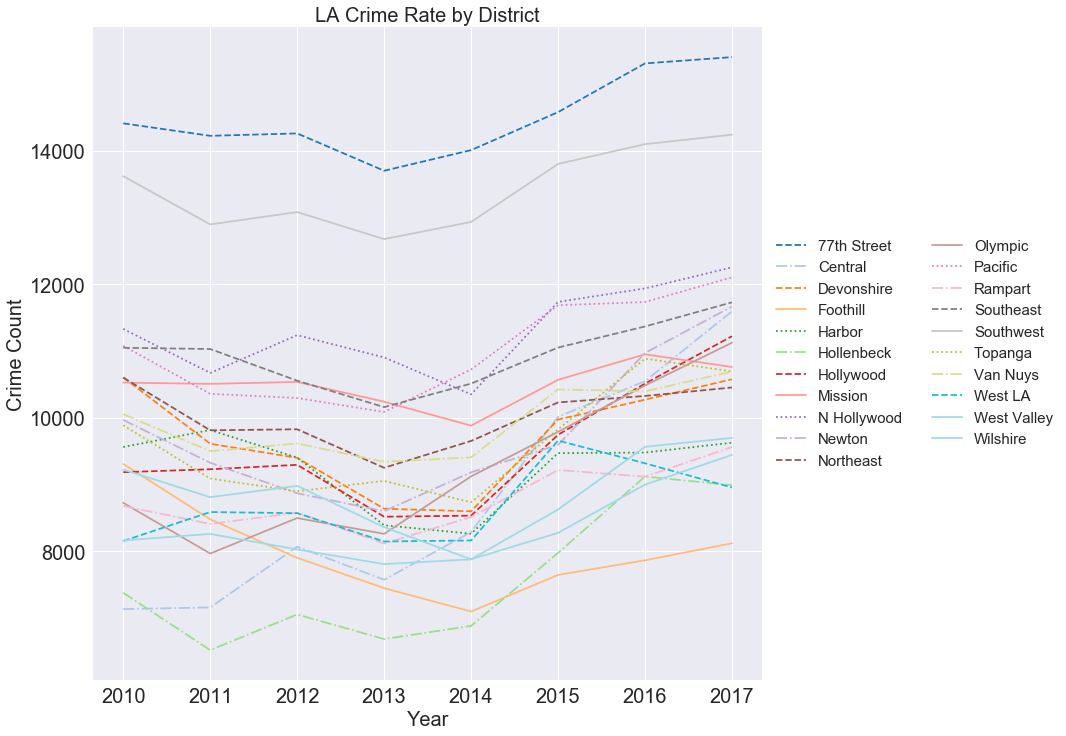

In [39]:
plot=yearly_data['Crime Count'].plot(by='Area Name',style=['--','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-','-',':','-.','--'],colormap='tab20',figsize=(12,12))
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15}, ncol=2,facecolor='inherit')
plt.ylabel('Crime Count',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('LA Crime Rate by District',fontsize=20)


In [40]:
# Seems that 77th Street and Southwest districts are the most dangerous 

In [41]:
#Hollenbeck was safest up until 2014
#Central area,Newton,Olympic crime has been rising rapidly since 2013 
#2014 seems to have the least amount of crime for areas in general 
#Foothill was able to bring down the crime significantly from 2010 to 2014 
# What happened in 2013 and 2014??? 

Text(0.5,1,'Regions With Increasing and Decreasing Crime')

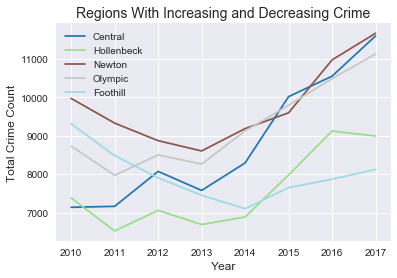

In [42]:
yearly_data['Crime Count'].plot(y=['Central','Hollenbeck','Newton','Olympic','Foothill'],colormap='tab20')
plt.legend(loc='upper left')
plt.xlabel('Year',fontsize=12)
plt.ylabel("Total Crime Count",fontsize=12)
plt.title('Regions With Increasing and Decreasing Crime',fontsize=14)

In [43]:
yearly_bycrime=timed_data.drop(columns='Date Occurred_Time Occurred')
yearly_bycrime=yearly_bycrime[yearly_bycrime['Year']!=2018]
yearly_bycrime.head(10)

Area Name                          Crime  Year
0  77th Street              Sex-Related Crime  2013
1      Olympic              Robbery and Theft  2010
2    Southeast              Robbery and Theft  2013
3    Southeast              Robbery and Theft  2010
4      Topanga  Vandalism and Property Damage  2014
5      Central                       Homocide  2013
6    Northeast              Robbery and Theft  2010
7     Foothill              Robbery and Theft  2010
8      Mission              Robbery and Theft  2010
9     Van Nuys              Robbery and Theft  2013

In [44]:
yearly_bycrime=yearly_bycrime.groupby(['Year','Area Name','Crime']).size().to_frame(name='Count')

In [45]:
yearly_bycrime

Count
Year Area Name   Crime                                                
2010 77th Street Assault                                          3151
                 Child-Related Crime                               395
                 Criminal Threats                                  698
                 Fraud and Bribery                                 106
                 Homocide                                           39
                 Kidnapping                                         62
                 Motor Vehicle and Transportation-Related Crime      2
                 Other                                             367
                 Robbery and Theft                                6885
                 Sex-Related Crime                                1082
                 Vandalism and Property Damage                    1282
                 Violation of Orders or Resisting Arrest           344
     Central     Assault                                          1653
                 Child-Related Crime                                40
                 Criminal Threats                                  351
                 Fraud and Bribery                                 118
                 Homocide                                            7
                 Kidnapping                                         11
                 Other                                             439
                 Robbery and Theft                                3422
                 Sex-Related Crime                                 487
                 Vandalism and Property Damage                     537
                 Violation of Orders or Resisting Arrest            69
                 Weapon possession/Bombing                           2
     Devonshire  Assault                                           950
                 Child-Related Crime                               141
                 Criminal Threats                                  310
                 Fraud and Bribery                                 194
                 Homocide                                            3
                 Kidnapping                                         22
...                                                                ...
2017 West LA     Sex-Related Crime                                 575
                 Vandalism and Property Damage                     707
                 Violation of Orders or Resisting Arrest            90
     West Valley Assault                                          1077
                 Child-Related Crime                                77
                 Criminal Threats                                  349
                 Fraud and Bribery                                 162
                 Homocide                                           10
                 Kidnapping                                         20
                 Motor Vehicle and Transportation-Related Crime      6
                 Other                                             293
                 Robbery and Theft                                5832
                 Sex-Related Crime                                 767
                 Vandalism and Property Damage                     807
                 Violation of Orders or Resisting Arrest           300
                 Weapon possession/Bombing                           1
     Wilshire    Assault                                          1131
                 Child-Related Crime                                74
                 Criminal Threats                                  326
                 Fraud and Bribery                                 143
                 Homocide                                            7
                 Human Trafficking                                   1
                 Kidnapping                                         11
                 Motor Vehicle and Transportation-Related Crime      3
                 O

In [46]:
central_mostcommon=yearly_bycrime.loc[(slice(None),'Central'),:]
central_mostcommon=central_mostcommon.reset_index()
central_mostcommon=central_mostcommon.loc[:,['Year','Crime','Count']]
central_mostcommon.set_index(['Year','Crime'],inplace=True)
central_mostcommon=central_mostcommon.unstack(level='Crime',fill_value=0)

In [47]:
hollenbeck_mostcommon=yearly_bycrime.loc[(slice(None),'Hollenbeck'),:]
hollenbeck_mostcommon=hollenbeck_mostcommon.reset_index()
hollenbeck_mostcommon=hollenbeck_mostcommon.loc[:,['Year','Crime','Count']]
hollenbeck_mostcommon.set_index(['Year','Crime'],inplace=True)
hollenbeck_mostcommon=hollenbeck_mostcommon.unstack(level='Crime',fill_value=0)
hollenbeck_mostcommon

Count                                                                  \
Crime Assault Child-Related Crime Criminal Threats Fraud and Bribery Homocide   
Year                                                                            
2010     1344                 195              341                59       21   
2011     1257                 213              298                75       20   
2012     1237                 201              274                55       21   
2013     1213                 185              298                99       18   
2014     1165                 133              282                76       16   
2015     1459                 139              262                64       12   
2016     1757                 155              363                67       14   
2017     1717                 147              356                62       17   

                                    \
Crime Human Trafficking Kidnapping   
Year                                 
2010                  0         19   
2011                  0         17   
2012                  0         17   
2013                  0         17   
2014                  0         16   
2015                  0         16   
2016                  0         17   
2017                  2         16   

                                                            \
Crime Motor Vehicle and Transportation-Related Crime Other   
Year                                                         
2010                                              13   186   
2011                                               5   111   
2012                                               4   135   
2013                                               5    88   
2014                                               2   143   
2015                                               3   129   
2016                                               5   134   
2017                                               5   170   

                                                                         \
Crime Riots and Disruption of Peace Robbery and Theft Sex-Related Crime   
Year                                                                      
2010                              0              3732               573   
2011                              0              3148               507   
2012                              0              3764               482   
2013                              0              3430               446   
2014                              0              3473               649   
2015                              1              3997               805   
2016                              0              4428               839   
2017                              0              4355               785   

                                                                             
Crime Vandalism and Property Damage Violation of Orders or Resisting Arrest  
Year                                                                         
2010                            738                                     159  
2011                            691                                     179  
2012                            723                                     143  
2013                            707                                     181  
2014                            708                                     221  
2015                            842                                     249  
2016                           1004                                     339  
2017                           1001                                     359

In [48]:
newton_mostcommon=yearly_bycrime.loc[(slice(None),'Newton'),:]
newton_mostcommon=newton_mostcommon.reset_index()
newton_mostcommon=newton_mostcommon.loc[:,['Year','Crime','Count']]
newton_mostcommon.set_index(['Year','Crime'],inplace=True)
newton_mostcommon=newton_mostcommon.unstack(level='Crime',fill_value=0)

In [49]:
olympic_mostcommon=yearly_bycrime.loc[(slice(None),'Olympic'),:]
olympic_mostcommon=olympic_mostcommon.reset_index()
olympic_mostcommon=olympic_mostcommon.loc[:,['Year','Crime','Count']]
olympic_mostcommon.set_index(['Year','Crime'],inplace=True)
olympic_mostcommon=olympic_mostcommon.unstack(level='Crime',fill_value=0)

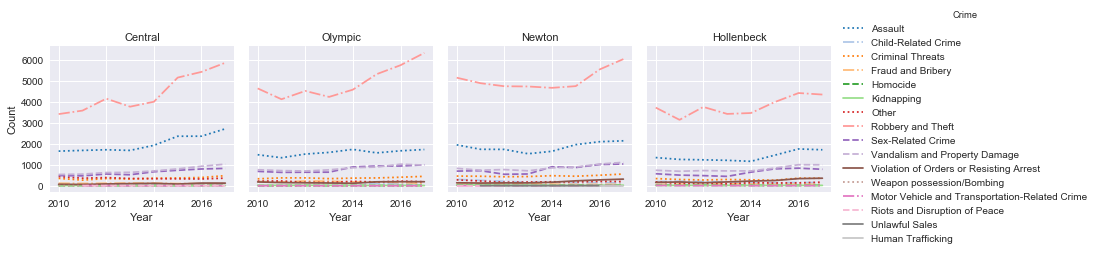

In [50]:
newdf=yearly_bycrime.reset_index()
newdf.set_index(['Area Name'],inplace=True)
newdf=newdf.loc[['Central','Olympic','Newton','Hollenbeck']]
newdf.reset_index(inplace=True)
g = sns.FacetGrid(newdf, col="Area Name", hue="Crime",palette='tab20',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']})
g.map(plt.plot, "Year", "Count")
g.add_legend()
g.set_titles("{col_name}")

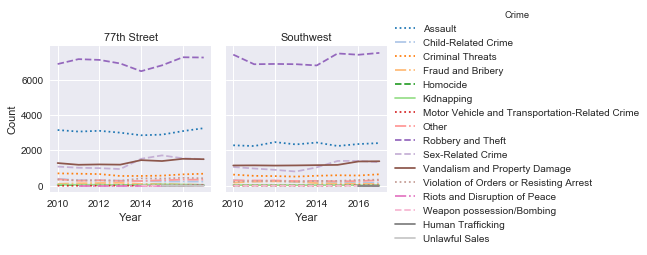

In [51]:
newdf=yearly_bycrime.reset_index()
newdf.set_index(['Area Name'],inplace=True)
high_crime=newdf.loc[['77th Street','Southwest']]
high_crime.reset_index(inplace=True)
g = sns.FacetGrid(high_crime, col="Area Name", hue="Crime",palette='tab20',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']})
g.map(plt.plot, "Year", "Count")
g.add_legend()
g.set_titles("{col_name}")

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]), <a list of 10 Text yticklabel objects>)

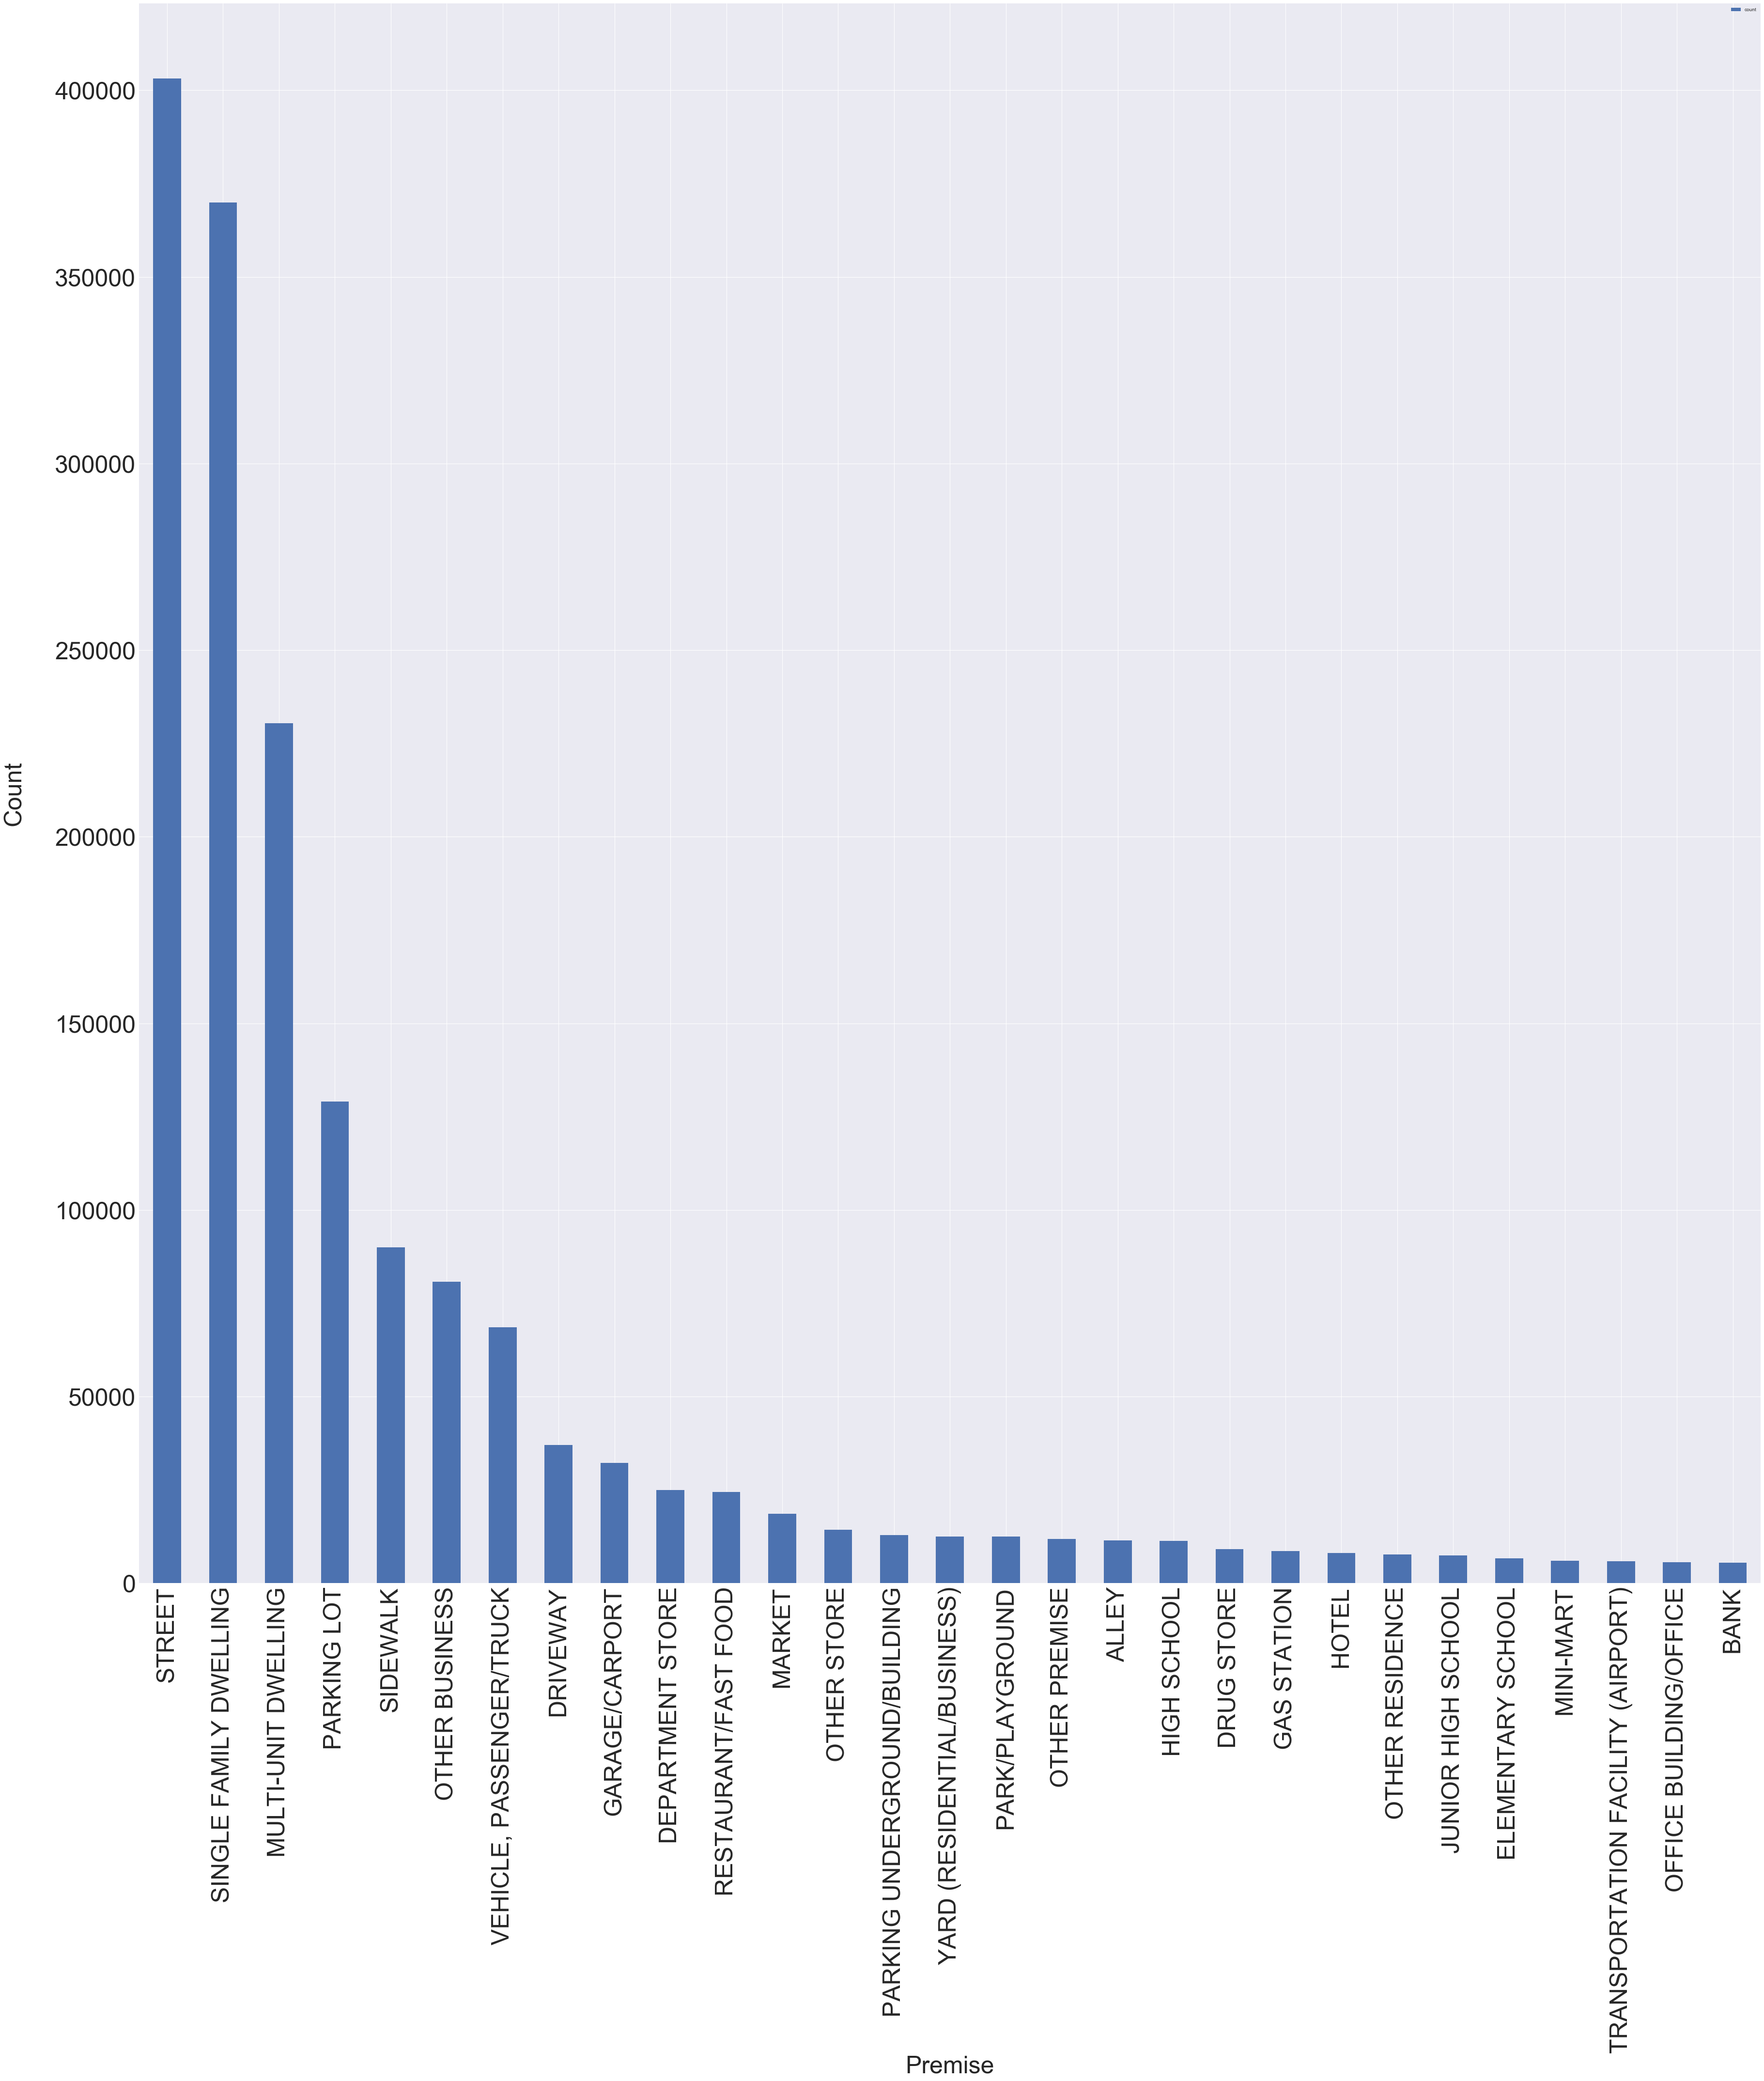

In [52]:
df_premise=df.loc[:,'Premise Description']
df_premise=df_premise.value_counts().to_frame('count')
df_premise=df_premise[df_premise['count']>5000]
df_premise.plot(kind='bar',figsize=(60,60))
plt.xlabel('Premise',fontsize=50)
plt.xticks(fontsize=50)
plt.ylabel('Count',fontsize=50,labelpad=60)
plt.yticks(fontsize=50)

In [105]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.loc['Central']
theft_assault_info.reset_index(inplace=True)
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc['Central']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info[theft_assault_info['Count']>0]
theft_assault_info.drop(columns='Area Name',inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime',fill_value=0)
premise=['STREET','SIDEWALK','MULTI-UNIT DWELLING','PARKING LOT','OTHER BUSINESS','DEPARTMENT STORE','OTHER STORE']
theft_assault_info=theft_assault_info['Count'].loc[premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
plt.legend(loc='upper right',prop={'size':120})
plt.title('Central District',fontsize=200)
plt.xlabel('Premise',fontsize=200)
plt.tight_layout()

In [109]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.loc['Olympic']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc['Olympic']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info[theft_assault_info['Count']>0]
theft_assault_info.drop(columns='Area Name',inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime',fill_value=0)
premise=['MULTI-UNIT DWELLING','STREET','SIDEWALK','PARKING LOT','OTHER BUSINESS','DEPARTMENT STORE','OTHER STORE']
theft_assault_info=theft_assault_info['Count'].loc[premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
plt.ylabel('Crime Count',fontsize=200)
plt.legend(loc='upper right',prop={'size':150})
plt.title('Olympic District',fontsize=200)
plt.xlabel('Premise',fontsize=200)
plt.tight_layout()

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

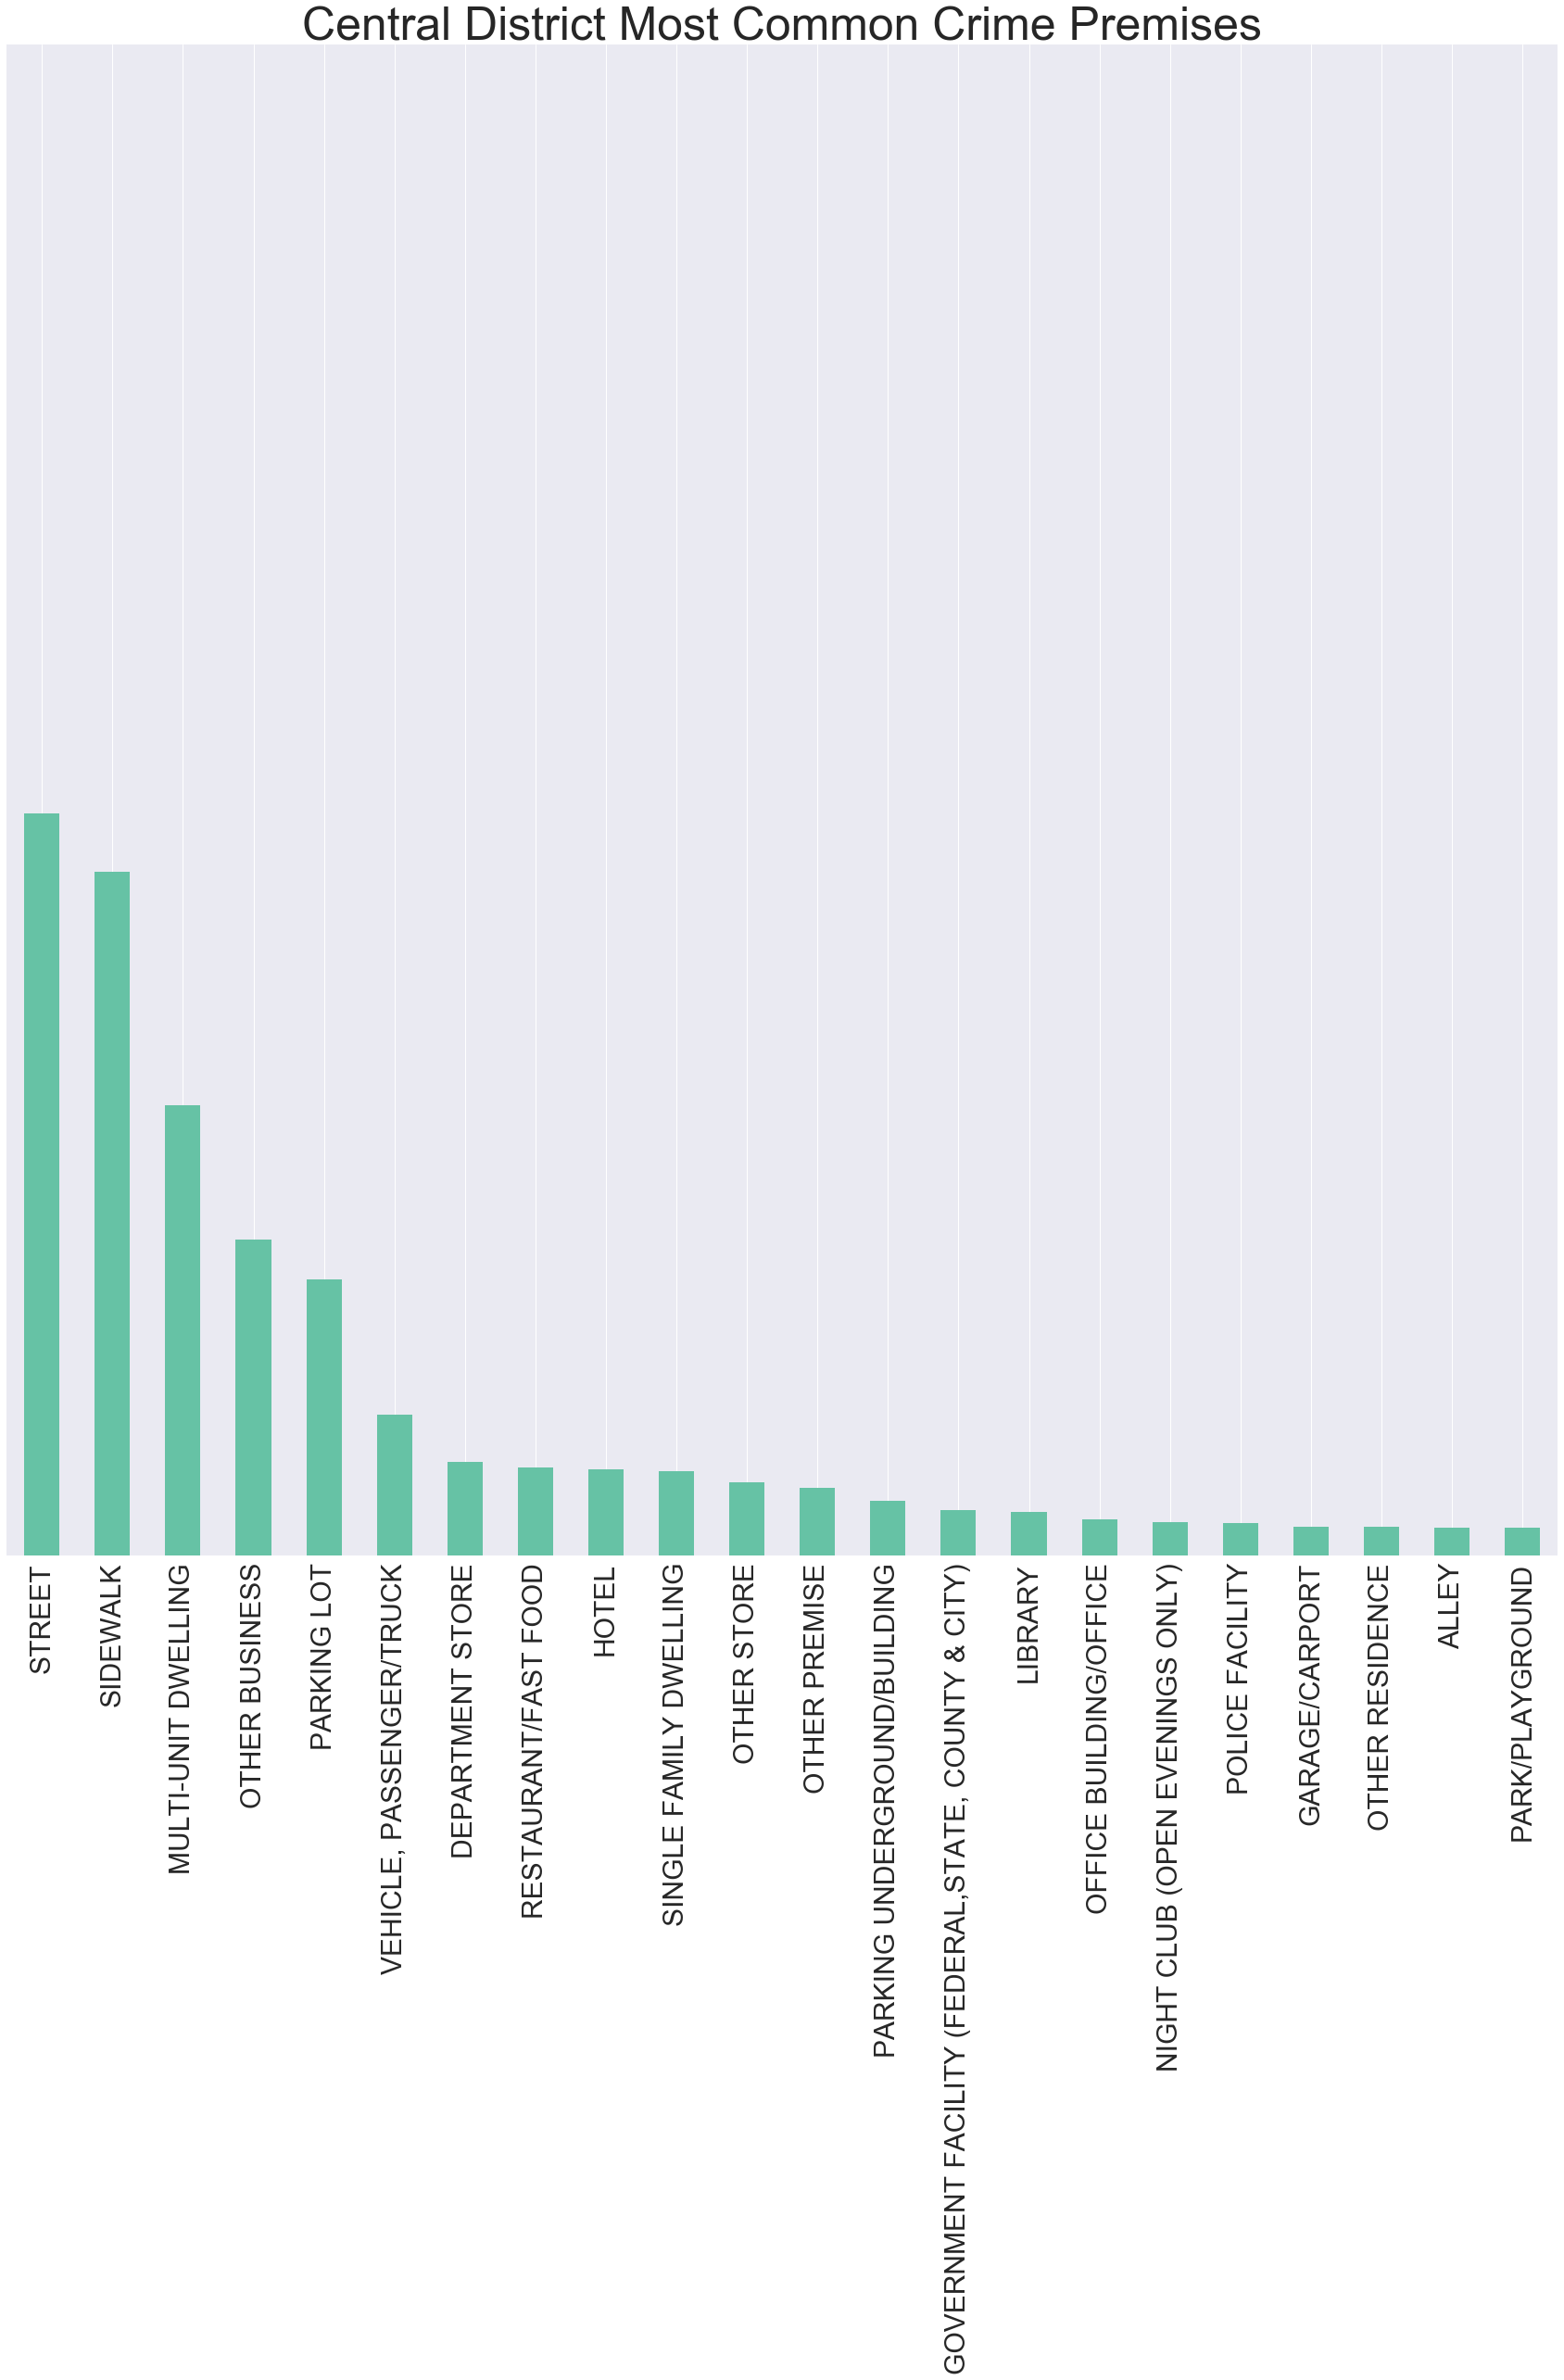

In [55]:
area_premise=df.loc[:,['Premise Description','Area Name']]
central_premise=area_premise[area_premise['Area Name']=='Central']
central_premise=central_premise.drop(columns='Area Name')
central_premise=central_premise['Premise Description'].value_counts().to_frame('Count')
central_premise=central_premise[central_premise['Count']>500]
central_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Set2')
plt.title('Central District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.yticks([])
plt.ylim(0,30000)
plt.yticks(fontsize=30)
plt.yticks(fontsize=30)

In [104]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.loc['Newton']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc['Newton']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info[theft_assault_info['Count']>0]
theft_assault_info.drop(columns='Area Name',inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime',fill_value=0)
premise=['STREET','SIDEWALK','MULTI-UNIT DWELLING','PARKING LOT','OTHER BUSINESS','DEPARTMENT STORE','OTHER STORE']
theft_assault_info['Count'].loc[premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
plt.legend(loc='upper right',prop={'size':120})
plt.title('Newton District',fontsize=200)
plt.xlabel('Premise',fontsize=200)
plt.tight_layout()
plt.ylabel('Crime Count',fontsize=200)

Text(555.125,0.5,'Crime Count')

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

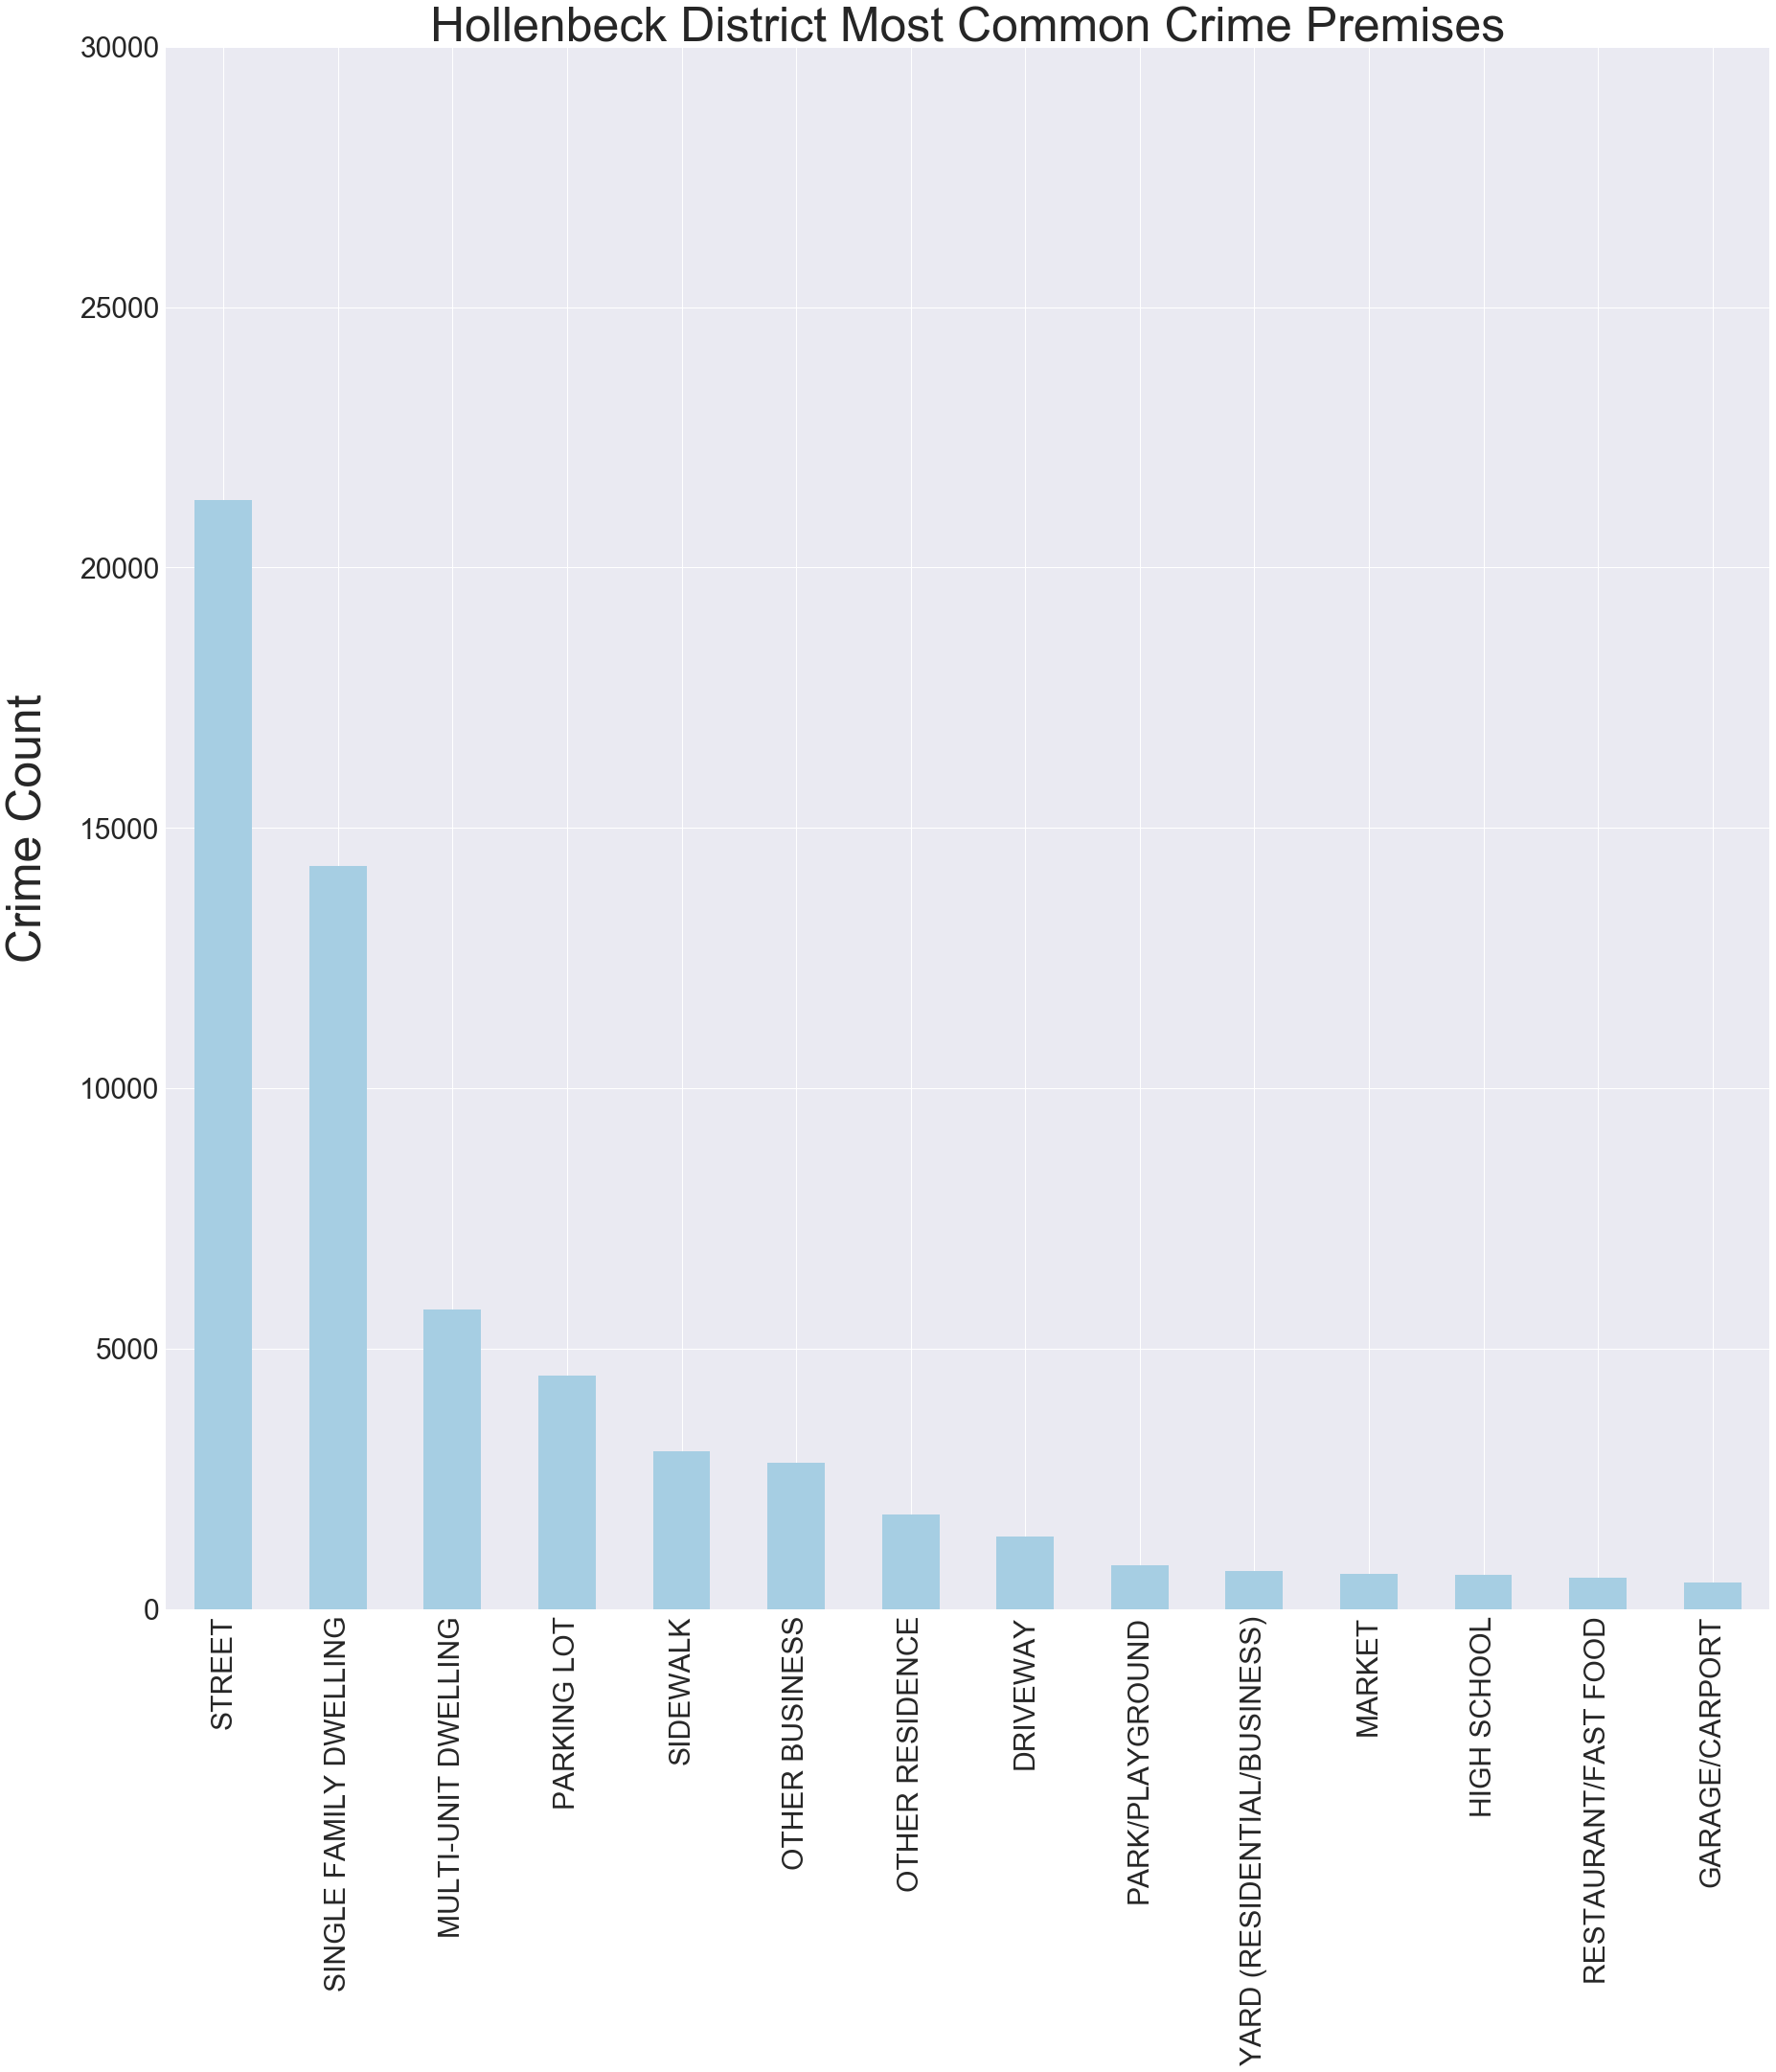

In [57]:
hollenbeck_premise=area_premise[area_premise['Area Name']=='Hollenbeck']
hollenbeck_premise=hollenbeck_premise.drop(columns='Area Name')
hollenbeck_premise=hollenbeck_premise['Premise Description'].value_counts().to_frame('Count')
hollenbeck_premise=hollenbeck_premise[hollenbeck_premise['Count']>500]
hollenbeck_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Paired')
plt.title('Hollenbeck District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel('Crime Count',fontsize=50,labelpad=30)
plt.ylim(0,30000)
plt.yticks(fontsize=30)

In [110]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.loc['Hollenbeck']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info[theft_assault_info['Count']>0]
theft_assault_info.drop(columns='Area Name',inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime',fill_value=0)
premise=['STREET','MULTI-UNIT DWELLING','PARKING LOT','OTHER BUSINESS','SIDEWALK','DEPARTMENT STORE','OTHER STORE']
theft_assault_info =theft_assault_info['Count'].loc[premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
plt.legend(loc='upper right',prop={'size':120})
plt.title('Hollenbeck District',fontsize=200)
plt.xlabel('Premise',fontsize=200)
plt.tight_layout()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

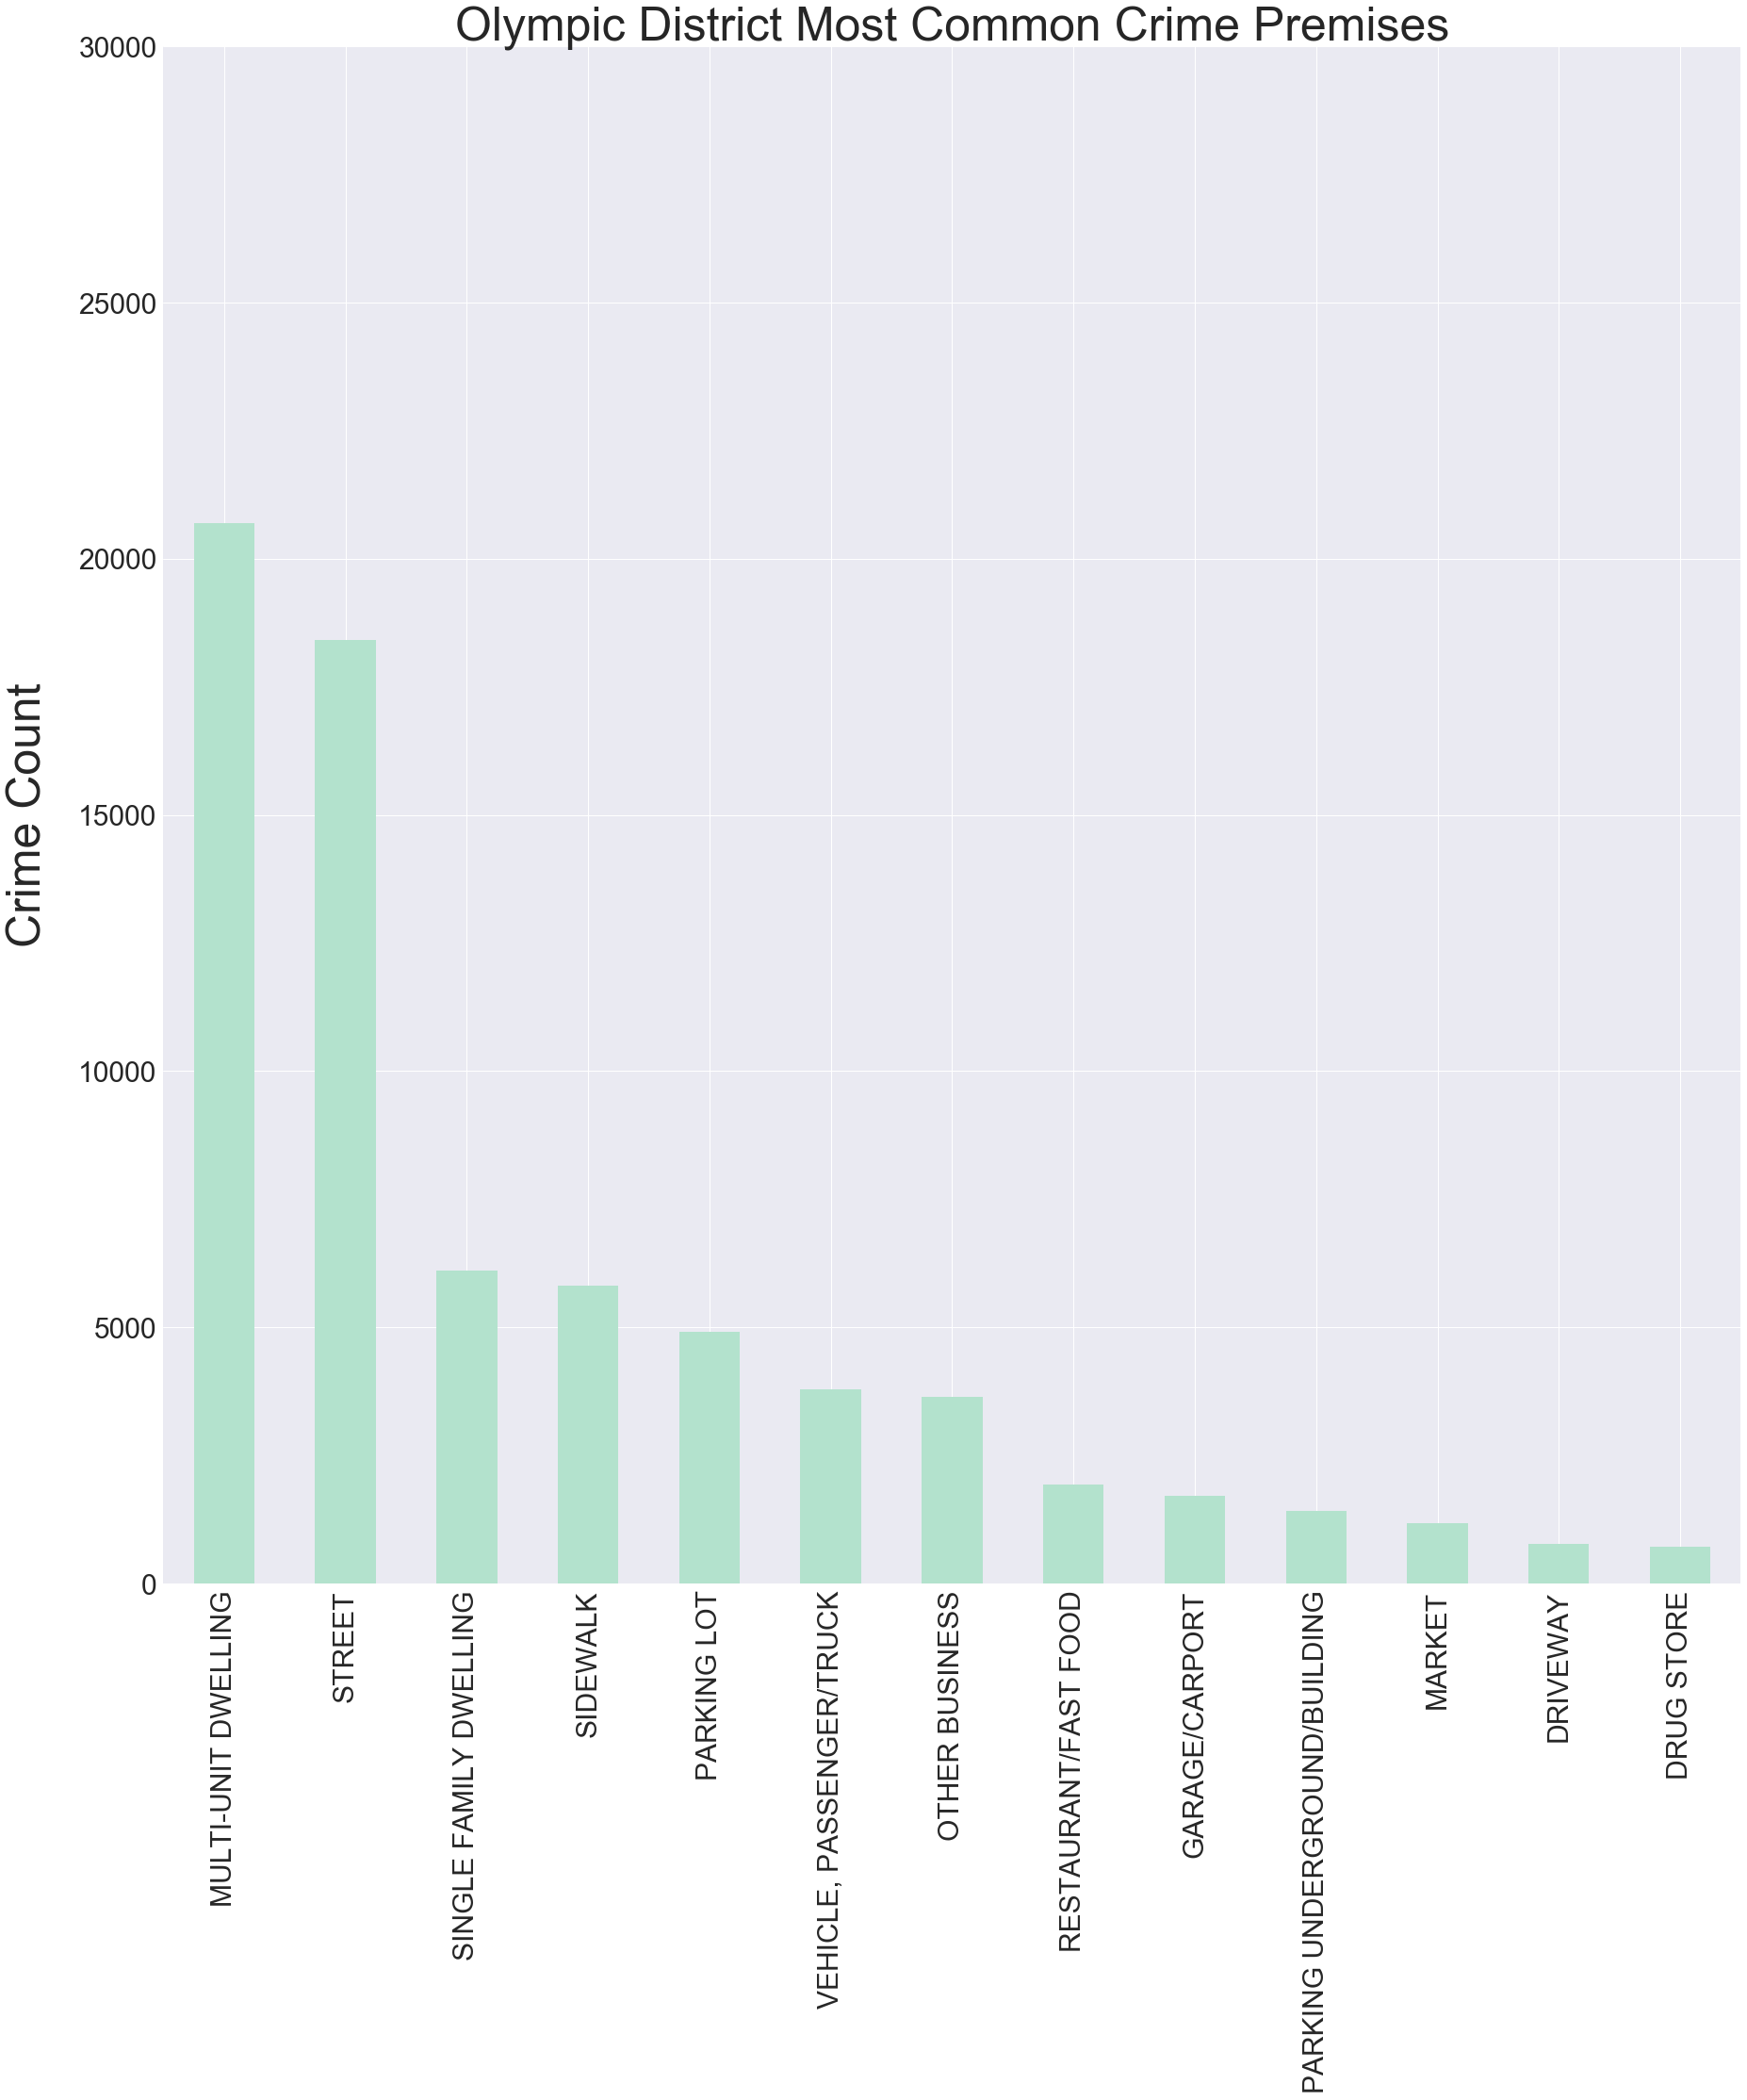

In [59]:
olympic_premise=area_premise[area_premise['Area Name']=='Olympic']
olympic_premise=olympic_premise.drop(columns='Area Name')
olympic_premise=olympic_premise['Premise Description'].value_counts().to_frame('Count')
olympic_premise=olympic_premise[olympic_premise['Count']>500]
olympic_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Pastel2')
plt.title('Olympic District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.ylim(0,30000)
plt.ylabel('Crime Count',fontsize=50,labelpad=30)
plt.yticks()
plt.yticks(fontsize=30)

In [60]:
crimeloc_info=df.loc[:,['Area Name','Crime','Premise Description']]
crimeloc_info.set_index('Area Name',inplace=True)
crimeloc_info=crimeloc_info.loc[['Central','Olympic','Newton','Hollenbeck']]
crimeloc_info=crimeloc_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
crimeloc_info.reset_index(inplace=True)
crimeloc_info.set_index(['Premise Description','Area Name','Crime'],inplace=True) 
crimeloc_info=crimeloc_info.unstack(level=['Area Name','Crime'],fill_value=0)
crimeloc_info


Count                     \
Area Name                                          Central Hollenbeck  Newton   
Crime                                              Assault    Assault Assault   
Premise Description                                                             
7TH AND METRO CENTER (NOT LINE SPECIFIC)                 8          0       0   
ABANDONED BUILDING ABANDONED HOUSE                       0          0       3   
ABATEMENT LOCATION                                       0          0       1   
ABORTION CLINIC/ABORTION FACILITY*                       0          0       1   
AIRCRAFT                                                 0          0       1   
ALLEY                                                  165        153     243   
AMTRAK TRAIN                                             1          0       0   
APARTMENT/CONDO COMMON LAUNDRY ROOM                      0          0       0   
ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE C...       3          0       0   
AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)       1          0       0   
AUTO REPAIR SHOP                                         2         17       7   
AUTO SALES LOT                                           1          0       3   
AUTO SUPPLY STORE*                                       0          2       1   
AUTOMATED TELLER MACHINE (ATM)                           0          0       0   
BALCONY*                                                 1          0       0   
BANK                                                    10          1       4   
BANKING INSIDE MARKET-STORE *                            0          0       0   
BAR/COCKTAIL/NIGHTCLUB                                 205         36      33   
BAR/SPORTS BAR (OPEN DAY & NIGHT)                       43          3      10   
BASKETBALL COURTS                                        0          0       0   
BEAUTY SUPPLY STORE                                      1          0       0   
BEAUTY/BARBER SHOP                                       3          9       6   
BOOK STORE                                               0          0       0   
BOWLING ALLEY*                                          10          0       0   
BUS DEPOT                                                7          0      12   
BUS DEPOT/TERMINAL, OTHER THAN MTA                       0          0       1   
BUS STOP                                                77         22      41   
BUS STOP OR LAYOVER                                      3          3       6   
BUS STOP/LAYOVER (ALSO QUERY 124)                        0          0       4   
BUS, SCHOOL, CHURCH                                      6         10       1   
...                                                    ...        ...     ...   
TERMINAL, OTHER THAN MTA                                 0          0       1   
THEATRE/MOVIE                                           53          0       0   
TOBACCO SHOP                                             0          0       0   
TOOL SHED*                                               0          0       1   
TOW YARD*                                                1          5       2   
TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*               3          2      11   
TRAIN                                                    5          1       0   
TRAIN DEPOT                                             14          1       1   
TRAIN DEPOT/TERMINAL, OTHER THAN MTA                     2          0       0   
TRAIN TRACKS                                             0          1       0   
TRAIN, OTHER THAN MTA (ALSO QUERY 809/810/811)           0          1       0   
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                    0          0       1   
TRANSIENT ENCAMPMENT                                     0          0       2   
TRANSITIONAL HOUSING/HALFWAY HOUSE                       0          0       2   
TRANSPORTATION FACILITY (AIRPORT)                        0          0       4   
TRA

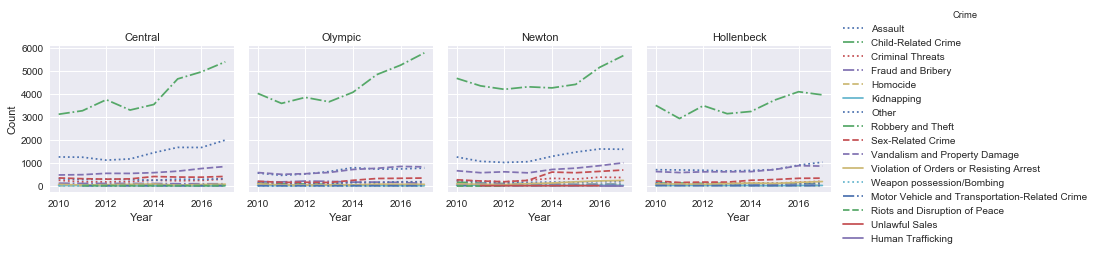

In [61]:
inv_cont=df.loc[:,['Date Occurred_Time Occurred','Crime','Status Description','Area Name']]
inv_cont=inv_cont[inv_cont['Status Description']=='Invest Cont']
inv_cont=inv_cont.set_index('Area Name')
inv_cont=inv_cont.loc[['Central','Olympic','Newton','Hollenbeck']]
inv_cont['Year']=inv_cont['Date Occurred_Time Occurred'].dt.year
inv_cont=inv_cont[inv_cont['Year']!=2018]
inv_cont.drop(columns=['Date Occurred_Time Occurred','Status Description'],inplace=True)
inv_cont=inv_cont.groupby(['Year','Area Name','Crime']).size().to_frame('Count')
inv_cont.reset_index(inplace=True)
g=sns.FacetGrid(inv_cont,col='Area Name',hue='Crime',palette='deep',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']},col_order=['Central','Olympic','Newton','Hollenbeck'])
g.map(plt.plot,'Year','Count')
g.add_legend()
g.set_titles("{col_name}")

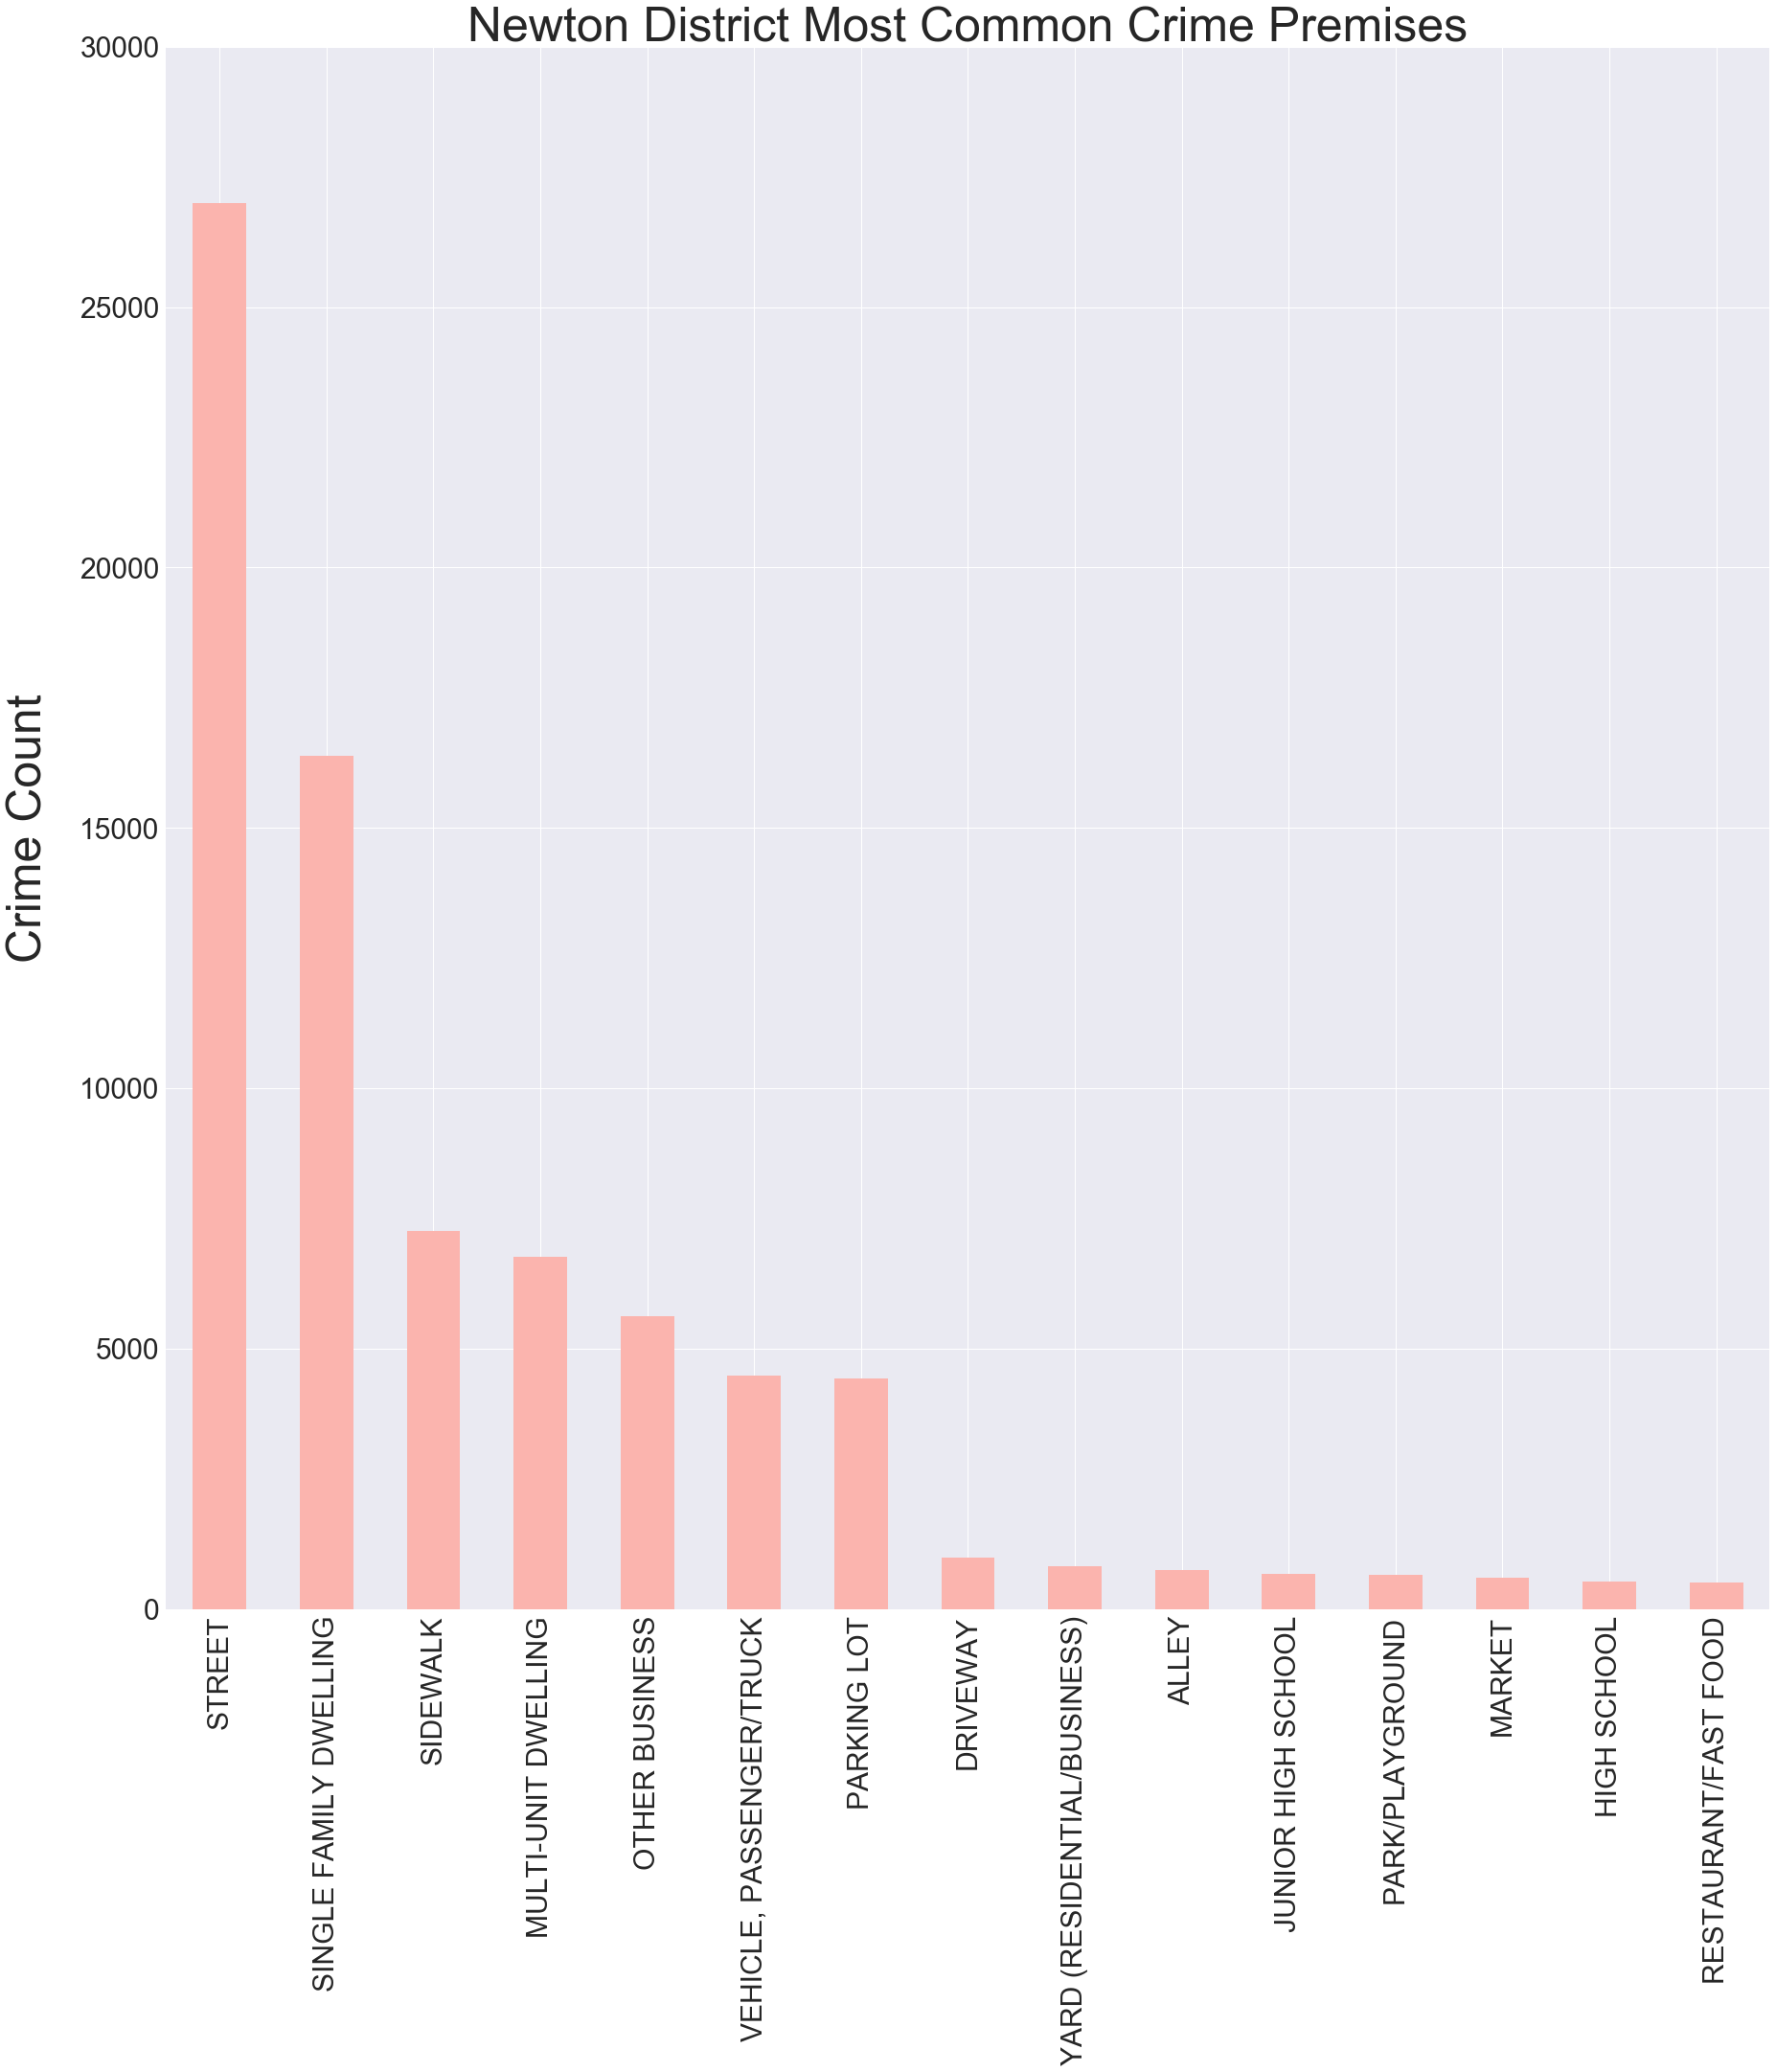

In [62]:
newton_premise=area_premise[area_premise['Area Name']=='Newton']
newton_premise=newton_premise.drop(columns='Area Name')
newton_premise=newton_premise['Premise Description'].value_counts().to_frame('Count')
newton_premise=newton_premise[newton_premise['Count']>500]
newton_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Pastel1')
plt.title('Newton District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.ylim(0,30000)
plt.ylabel('Crime Count',fontsize=50,labelpad=30)
plt.yticks(fontsize=30)
ax=plt.gca()
ax.yaxis.grid(True)

In [63]:
df.head()

Date Occurred_Time Occurred    Area Name  \
0         2013-03-11 18:00:00  77th Street   
1         2010-01-22 23:00:00      Olympic   
2         2013-03-18 20:30:00    Southeast   
3         2010-11-10 18:00:00    Southeast   
4         2014-01-04 23:00:00      Topanga   

                     Crime Code Description Victim Age Victim Sex  \
0         INTIMATE PARTNER - SIMPLE ASSAULT         30          F   
1                          VEHICLE - STOLEN    Missing    Missing   
2                          VEHICLE - STOLEN         12    Missing   
3                          VEHICLE - STOLEN    Missing    Missing   
4  VANDALISM - MISDEAMEANOR ($399 OR UNDER)         84          M   

  Victim Descent     Premise Description Status Description  \
0              W     MULTI-UNIT DWELLING        Adult Other   
1        Missing                  STREET        Invest Cont   
2        Missing                  STREET        Invest Cont   
3        Missing                  STREET        Invest Cont   
4              W  SINGLE FAMILY DWELLING        Invest Cont   

              Location  Date Occurred Time Occurred Time Code  \
0  (33.9829, -118.3338)    2013-03-11      18:00:00   Evening   
1  (34.0454, -118.3157)    2010-01-22      23:00:00     Night   
2   (33.942, -118.2717)    2013-03-18      20:30:00   Evening   
3  (33.9572, -118.2717)    2010-11-10      18:00:00   Evening   
4  (34.2009, -118.6369)    2014-01-04      23:00:00     Night   

                           Crime                   Crime_Detailed  
0              Sex-Related Crime  Rape and Sexual Assault/Battery  
1              Robbery and Theft     Vehicle/Transportation Theft  
2              Robbery and Theft     Vehicle/Transportation Theft  
3              Robbery and Theft     Vehicle/Transportation Theft  
4  Vandalism and Property Damage    Vandalism and Property Damage

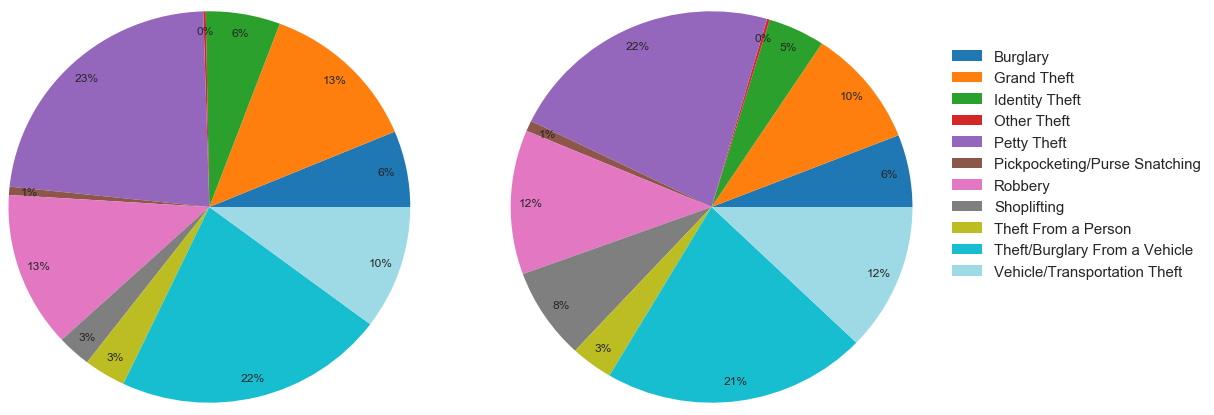

In [94]:
dcrime_by_district=df.loc[:,['Area Name','Crime','Crime_Detailed','Date Occurred_Time Occurred']]
dcrime_by_district['Date Occurred']=dcrime_by_district['Date Occurred_Time Occurred'].dt.year
dcrime_central=dcrime_by_district[(dcrime_by_district['Area Name']=='Central') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_central_before=dcrime_central[dcrime_central['Date Occurred']<2013]
dcrime_central_after=dcrime_central[dcrime_central['Date Occurred']>=2013]
dcrime_central_before=dcrime_central_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_central_after=dcrime_central_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_central_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_central_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_central_after.index)

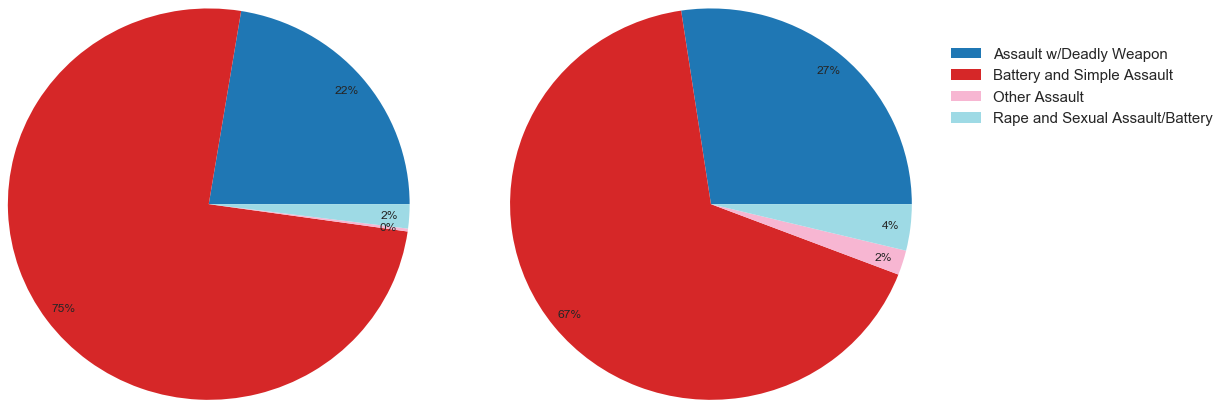

In [82]:
dcrime_by_district=df.loc[:,['Area Name','Crime','Crime_Detailed','Date Occurred_Time Occurred']]
dcrime_by_district['Date Occurred']=dcrime_by_district['Date Occurred_Time Occurred'].dt.year
dcrime_central=dcrime_by_district[(dcrime_by_district['Area Name']=='Central') & (dcrime_by_district['Crime']=='Assault')]
dcrime_central_before=dcrime_central[dcrime_central['Date Occurred']<2013]
dcrime_central_after=dcrime_central[dcrime_central['Date Occurred']>=2013]
dcrime_central_before=dcrime_central_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_central_after=dcrime_central_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_central_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_central_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_central_after.index)

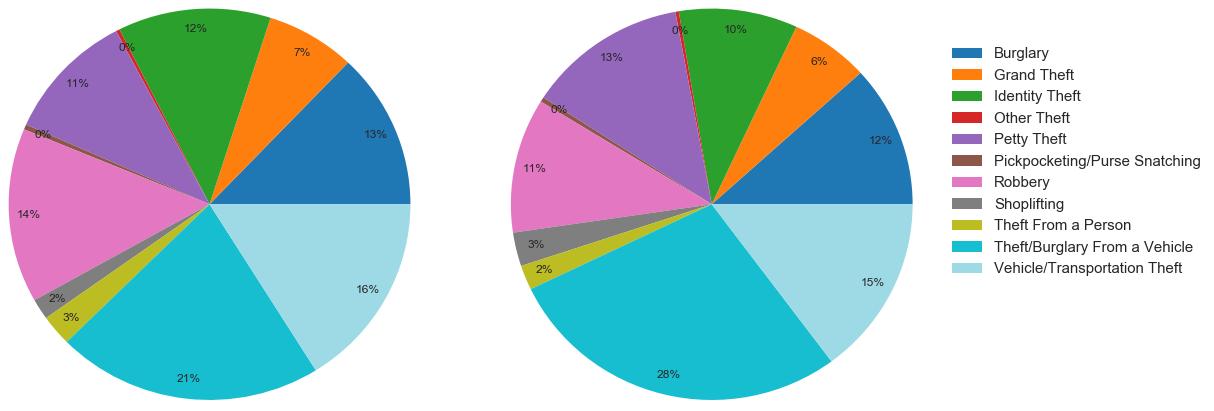

In [66]:
dcrime_olympic=dcrime_by_district[(dcrime_by_district['Area Name']=='Olympic') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_olympic_before=dcrime_olympic[dcrime_olympic['Date Occurred']<2013]
dcrime_olympic_after=dcrime_olympic[dcrime_olympic['Date Occurred']>=2013]
dcrime_olympic_before=dcrime_olympic_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_olympic_after=dcrime_olympic_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_olympic_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_olympic_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_olympic_after.index)

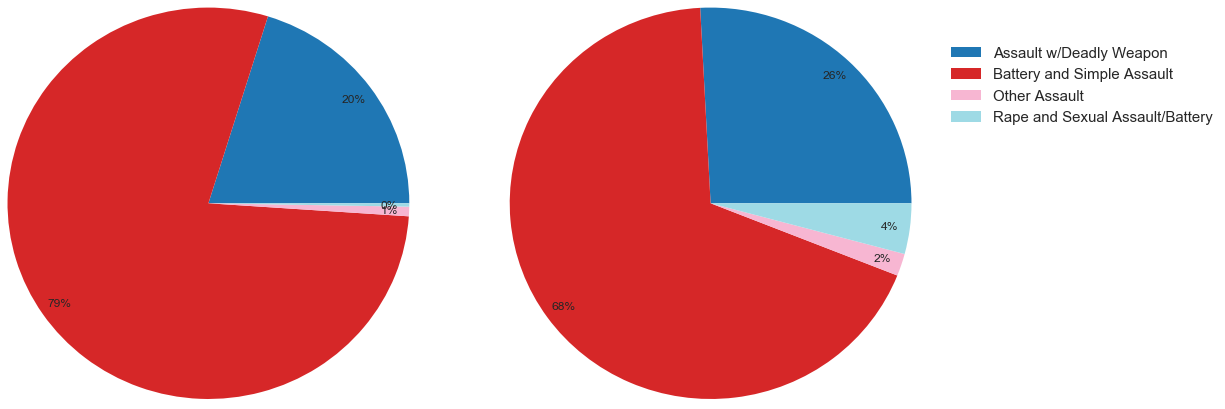

In [67]:
dcrime_olympic=dcrime_by_district[(dcrime_by_district['Area Name']=='Olympic') & (dcrime_by_district['Crime']=='Assault')]
dcrime_olympic_before=dcrime_olympic[dcrime_olympic['Date Occurred']<2013]
dcrime_olympic_after=dcrime_olympic[dcrime_olympic['Date Occurred']>=2013]
dcrime_olympic_before=dcrime_olympic_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_olympic_after=dcrime_olympic_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_olympic_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_olympic_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_olympic_after.index)

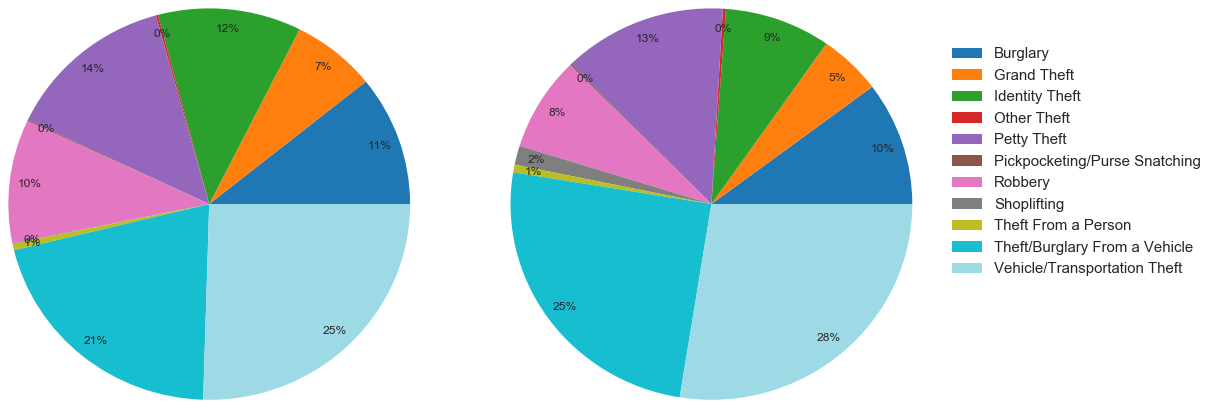

In [68]:
dcrime_hollenbeck=dcrime_by_district[(dcrime_by_district['Area Name']=='Hollenbeck') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_hollenbeck_before=dcrime_hollenbeck[dcrime_hollenbeck['Date Occurred']<2013]
dcrime_hollenbeck_after=dcrime_hollenbeck[dcrime_hollenbeck['Date Occurred']>=2013]
dcrime_hollenbeck_before=dcrime_hollenbeck_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_hollenbeck_after=dcrime_hollenbeck_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_hollenbeck_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_hollenbeck_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_hollenbeck_after.index)

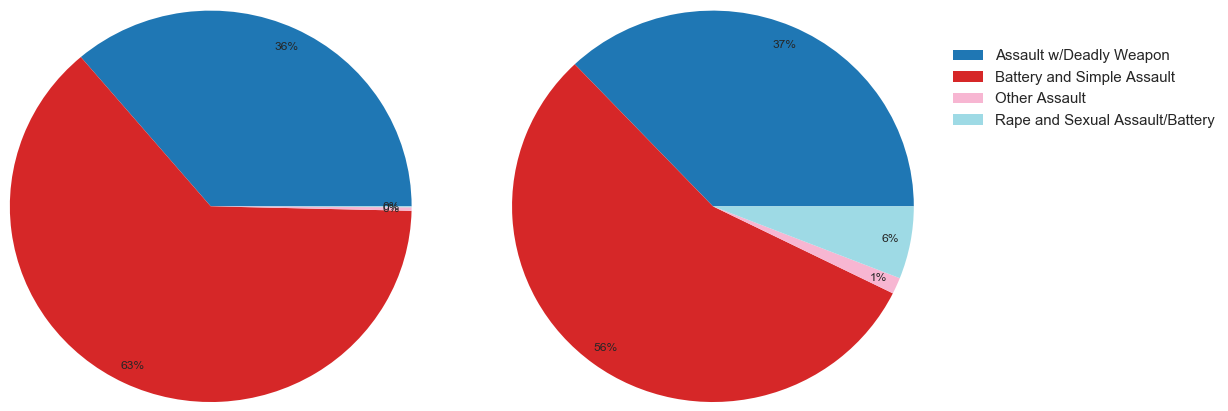

In [69]:
dcrime_hollenbeck=dcrime_by_district[(dcrime_by_district['Area Name']=='Hollenbeck') & (dcrime_by_district['Crime']=='Assault')]
dcrime_hollenbeck_before=dcrime_hollenbeck[dcrime_hollenbeck['Date Occurred']<2013]
dcrime_hollenbeck_after=dcrime_hollenbeck[dcrime_hollenbeck['Date Occurred']>=2013]
dcrime_hollenbeck_before=dcrime_hollenbeck_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_hollenbeck_after=dcrime_hollenbeck_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_hollenbeck_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_hollenbeck_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_hollenbeck_after.index)

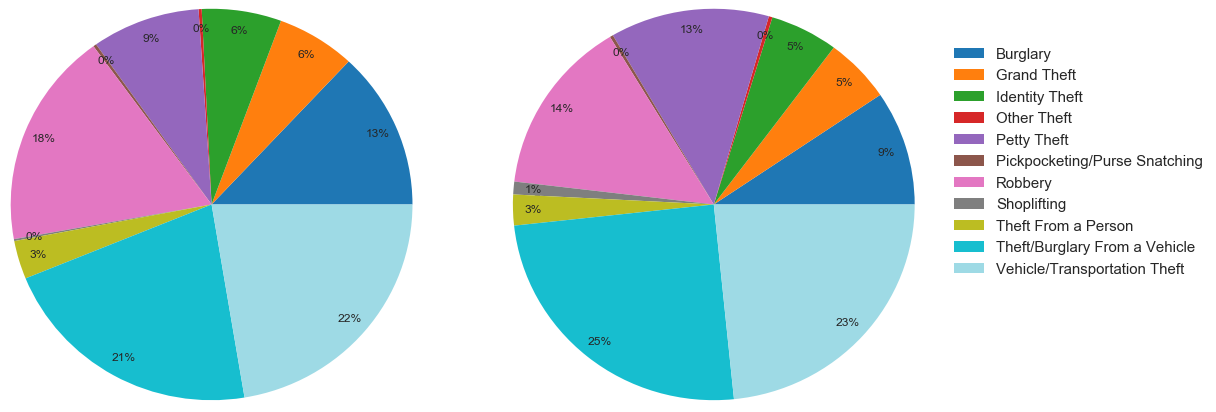

In [70]:
dcrime_newton=dcrime_by_district[(dcrime_by_district['Area Name']=='Newton') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_newton_before=dcrime_newton[dcrime_newton['Date Occurred']<2013]
dcrime_newton_after=dcrime_newton[dcrime_newton['Date Occurred']>=2013]
dcrime_newton_before=dcrime_newton_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_newton_after=dcrime_newton_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_newton_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_newton_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_newton_after.index)

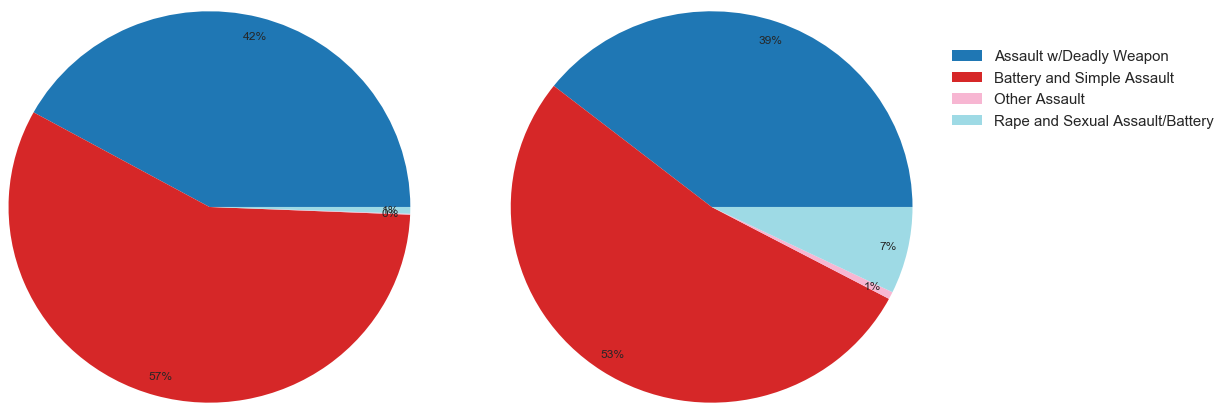

In [71]:
dcrime_newton=dcrime_by_district[(dcrime_by_district['Area Name']=='Newton') & (dcrime_by_district['Crime']=='Assault')]
dcrime_newton_before=dcrime_newton[dcrime_newton['Date Occurred']<2013]
dcrime_newton_after=dcrime_newton[dcrime_newton['Date Occurred']>=2013]
dcrime_newton_before=dcrime_newton_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_newton_after=dcrime_newton_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_newton_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_newton_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_newton_after.index)

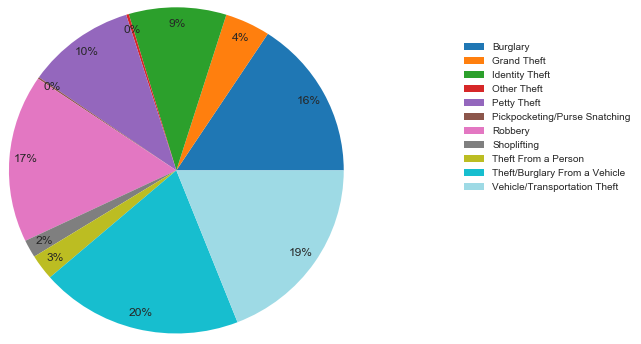

In [72]:
dcrime_77th=dcrime_by_district[(dcrime_by_district['Area Name']=='77th Street') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_77th=dcrime_77th.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_77th.plot.pie(y='Count',colormap='tab20',autopct='%1.0f%%',pctdistance=.90, radius=1.5,figsize=(5,5),labels=None)
plt.legend(bbox_to_anchor=(1.5,1),labels=dcrime_77th.index)

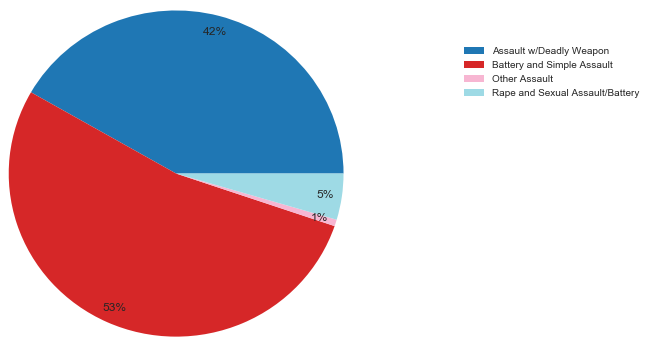

In [73]:
dcrime_77th=dcrime_by_district[(dcrime_by_district['Area Name']=='77th Street') & (dcrime_by_district['Crime']=='Assault')]
dcrime_77th=dcrime_77th.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_77th.plot.pie(y='Count',colormap='tab20',autopct='%1.0f%%',pctdistance=.90, radius=1.5,figsize=(5,5),labels=None)
plt.legend(bbox_to_anchor=(1.5,1),labels=dcrime_77th.index)

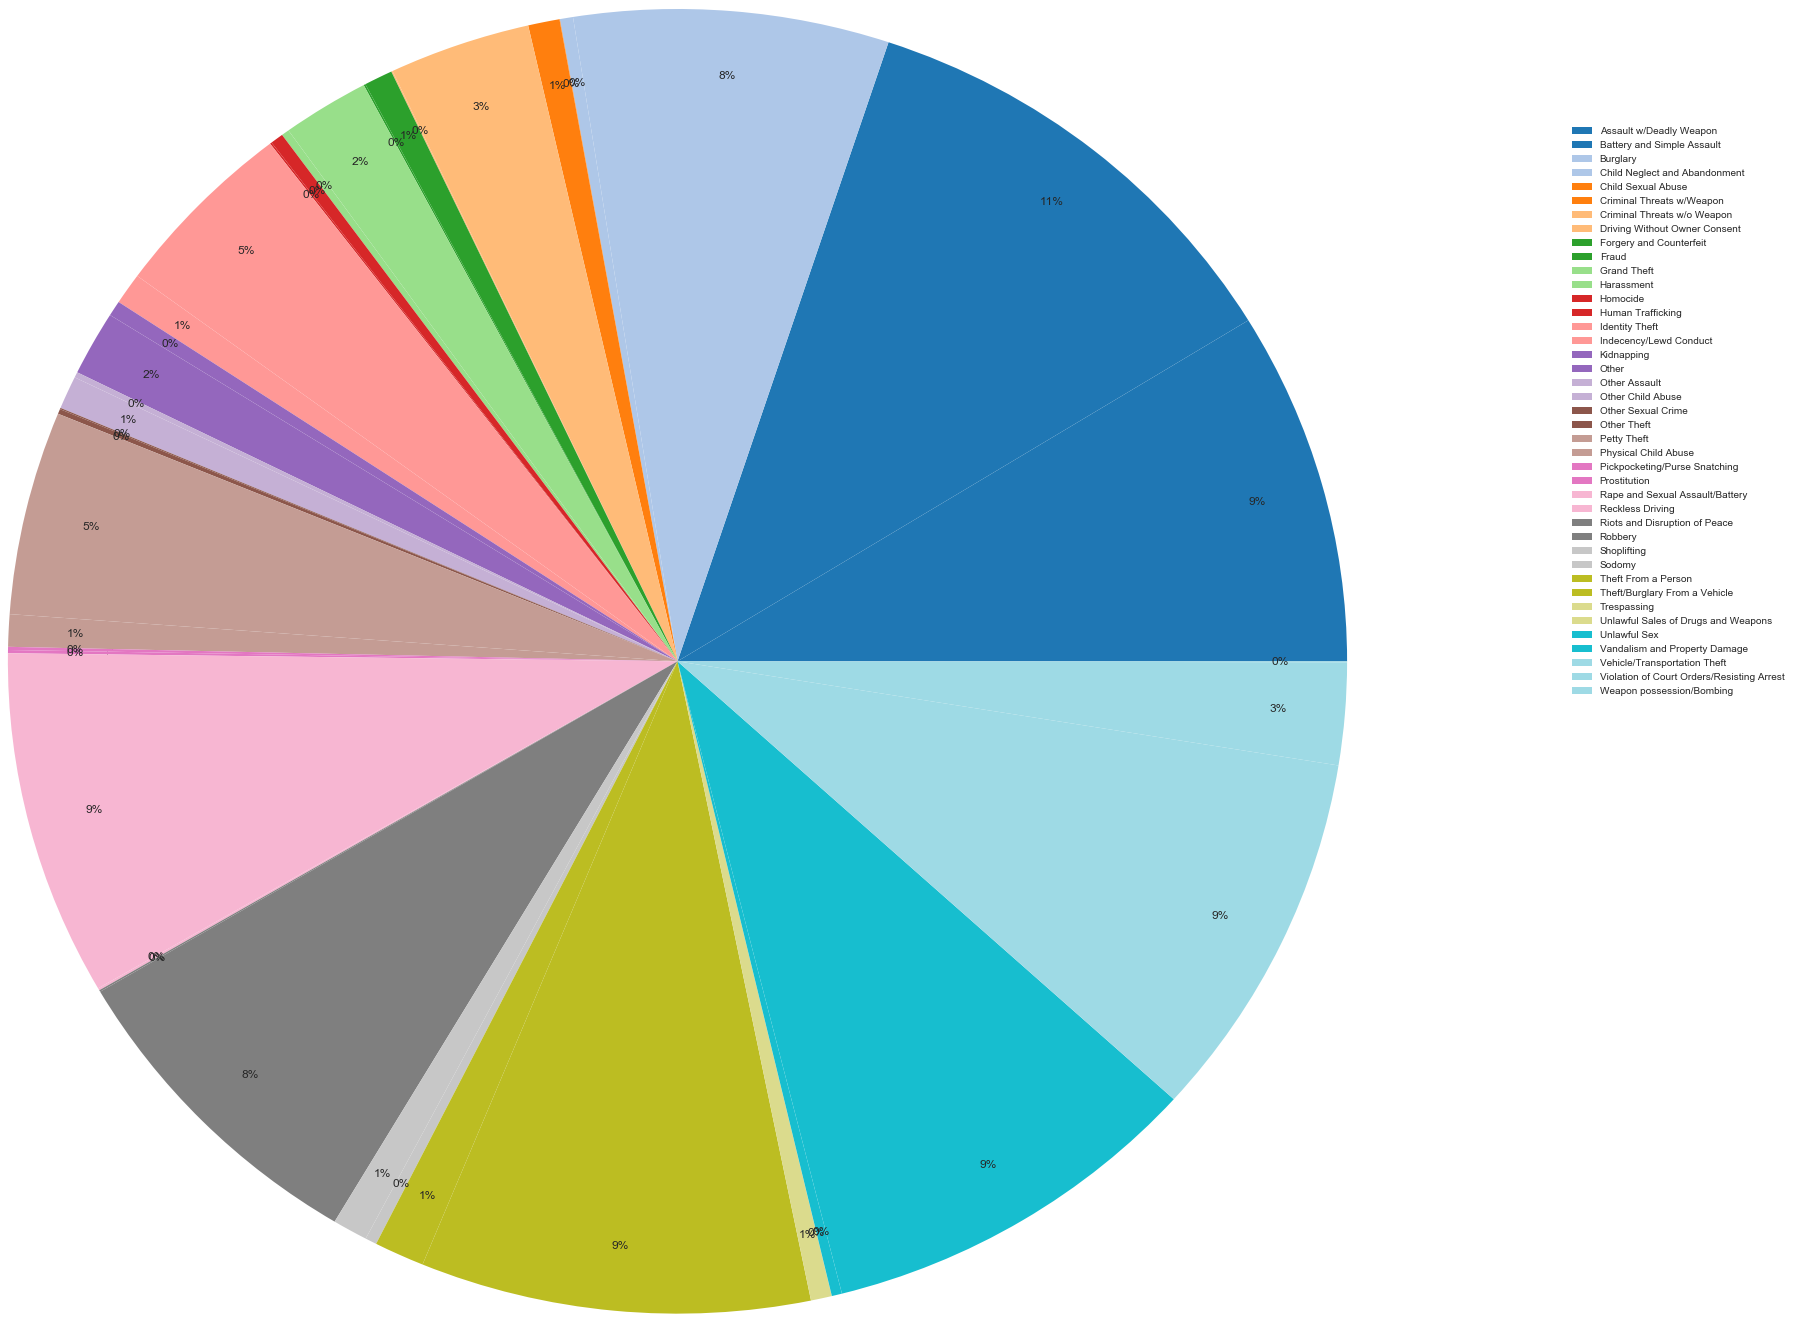

In [74]:
dcrime_77th=dcrime_by_district[(dcrime_by_district['Area Name']=='77th Street')]
dcrime_77th=dcrime_77th.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_77th.plot.pie(y='Count',colormap='tab20',autopct='%1.0f%%',pctdistance=.90, radius=1.5,figsize=(20,20),labels=None)
plt.legend(bbox_to_anchor=(1.5,1),labels=dcrime_77th.index)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


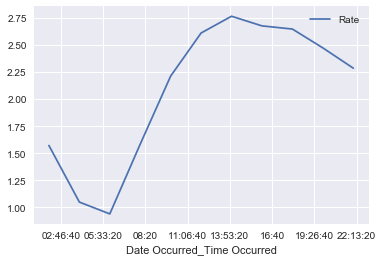

In [75]:
crime_time=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime Code Description']]
crime_time_central=crime_time[crime_time['Area Name']=='Central']
crime_time_central.drop(columns='Area Name',inplace=True)
crime_time_central.set_index('Date Occurred_Time Occurred',inplace=True)
crime_time_central=crime_time_central.resample('2H').count()
crime_time_central.reset_index(inplace=True)
crime_time_central['Date Occurred_Time Occurred']=crime_time_central['Date Occurred_Time Occurred'].dt.time
crime_time_central=crime_time_central.groupby('Date Occurred_Time Occurred')['Crime Code Description'].mean().to_frame('Rate')
crime_time_central=crime_time_central.rolling(window=2).mean()
crime_time_central.plot()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


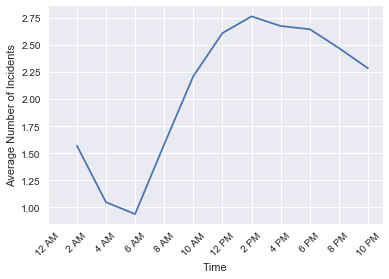

In [76]:
crime_time=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime Code Description']]
crime_time_central=crime_time[crime_time['Area Name']=='Central']
crime_time_central.drop(columns='Area Name',inplace=True)
crime_time_central.set_index('Date Occurred_Time Occurred',inplace=True)
crime_time_central=crime_time_central.resample('2H').count()
crime_time_central.reset_index(inplace=True)
crime_time_central['Date Occurred_Time Occurred']=crime_time_central['Date Occurred_Time Occurred'].dt.time
crime_time_central=crime_time_central.groupby('Date Occurred_Time Occurred')['Crime Code Description'].mean().to_frame('Rate')
crime_time_central_rolling=crime_time_central.rolling(window=2).mean()
crime_time_central_rolling.plot()
ax=plt.gca() 
ax.set_xticks(crime_time_central.index)
ax.set_xticklabels(['12 AM','2 AM','4 AM','6 AM','8 AM','10 AM','12 PM','2 PM','4 PM','6 PM','8 PM','10 PM'],rotation=45)
plt.xlabel('Time')
plt.ylabel('Average Number of Incidents')
plt.legend([])

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


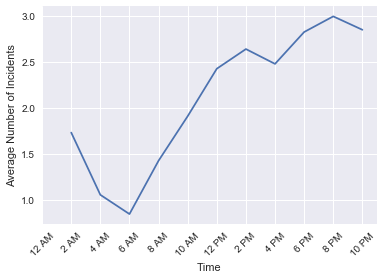

In [77]:
crime_time=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime Code Description']]
crime_time_olympic=crime_time[crime_time['Area Name']=='Olympic']
crime_time_olympic.drop(columns='Area Name',inplace=True)
crime_time_olympic.set_index('Date Occurred_Time Occurred',inplace=True)
crime_time_olympic=crime_time_olympic.resample('2H').count()
crime_time_olympic.reset_index(inplace=True)
crime_time_olympic['Date Occurred_Time Occurred']=crime_time_olympic['Date Occurred_Time Occurred'].dt.time
crime_time_olympic=crime_time_olympic.groupby('Date Occurred_Time Occurred')['Crime Code Description'].mean().to_frame('Rate')
crime_time_olympic_rolling=crime_time_olympic.rolling(window=2).mean()
crime_time_olympic_rolling.plot()
ax=plt.gca() 
ax.set_xticks(crime_time_olympic.index)
ax.set_xticklabels(['12 AM','2 AM','4 AM','6 AM','8 AM','10 AM','12 PM','2 PM','4 PM','6 PM','8 PM','10 PM'],rotation=45)
plt.xlabel('Time')
plt.ylabel('Average Number of Incidents')
plt.legend([])

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


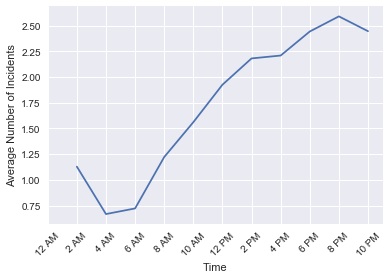

In [78]:
crime_time=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime Code Description']]
crime_time_hollenbeck=crime_time[crime_time['Area Name']=='Hollenbeck']
crime_time_hollenbeck.drop(columns='Area Name',inplace=True)
crime_time_hollenbeck.set_index('Date Occurred_Time Occurred',inplace=True)
crime_time_hollenbeck=crime_time_hollenbeck.resample('2H').count()
crime_time_hollenbeck.reset_index(inplace=True)
crime_time_hollenbeck['Date Occurred_Time Occurred']=crime_time_hollenbeck['Date Occurred_Time Occurred'].dt.time
crime_time_hollenbeck=crime_time_hollenbeck.groupby('Date Occurred_Time Occurred')['Crime Code Description'].mean().to_frame('Rate')
crime_time_hollenbeck_rolling=crime_time_hollenbeck.rolling(window=2).mean()
crime_time_hollenbeck_rolling.plot()
ax=plt.gca() 
ax.set_xticks(crime_time_hollenbeck.index)
ax.set_xticklabels(['12 AM','2 AM','4 AM','6 AM','8 AM','10 AM','12 PM','2 PM','4 PM','6 PM','8 PM','10 PM'],rotation=45)
plt.xlabel('Time')
plt.ylabel('Average Number of Incidents')
plt.legend([])

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


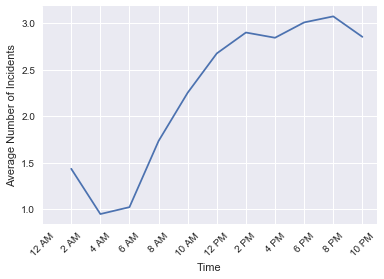

In [79]:
crime_time=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime Code Description']]
crime_time_newton=crime_time[crime_time['Area Name']=='Newton']
crime_time_newton.drop(columns='Area Name',inplace=True)
crime_time_newton.set_index('Date Occurred_Time Occurred',inplace=True)
crime_time_newton=crime_time_newton.resample('2H').count()
crime_time_newton.reset_index(inplace=True)
crime_time_newton['Date Occurred_Time Occurred']=crime_time_newton['Date Occurred_Time Occurred'].dt.time
crime_time_newton=crime_time_newton.groupby('Date Occurred_Time Occurred')['Crime Code Description'].mean().to_frame('Rate')
crime_time_newton_rolling=crime_time_newton.rolling(window=2).mean()
crime_time_newton_rolling.plot()
ax=plt.gca() 
ax.set_xticks(crime_time_newton.index)
ax.set_xticklabels(['12 AM','2 AM','4 AM','6 AM','8 AM','10 AM','12 PM','2 PM','4 PM','6 PM','8 PM','10 PM'],rotation=45)
plt.xlabel('Time')
plt.ylabel('Average Number of Incidents')
plt.legend([])

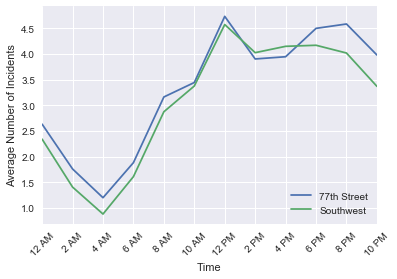

In [112]:
crime_time=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime Code Description']]
crime_time_high=crime_time[(crime_time['Area Name']=='77th Street')| (crime_time['Area Name']=='Southwest')]
crime_time_high.set_index(['Date Occurred_Time Occurred'],inplace=True)
crime_time_high=crime_time_high.groupby('Area Name')
crime_time_high=crime_time_high.resample('2H').count()
crime_time_high.drop(columns='Area Name',inplace=True)
crime_time_high.reset_index(inplace=True)
crime_time_high['Time Occurred']=crime_time_high['Date Occurred_Time Occurred'].dt.time
crime_time_high.drop(columns='Date Occurred_Time Occurred',inplace=True)
crime_time_high=crime_time_high.groupby(['Time Occurred','Area Name'])['Crime Code Description'].mean().to_frame('Average')
crime_time_high=crime_time_high.unstack(level='Area Name')
crime_time_high.plot()
ax=plt.gca() 
ax.set_xticks(crime_time_rising.index)
plt.xlim(crime_time_high.index[0],crime_time_high.index[-1])
ax.set_xticklabels(['12 AM','2 AM','4 AM','6 AM','8 AM','10 AM','12 PM','2 PM','4 PM','6 PM','8 PM','10 PM'],rotation=45)
plt.xlabel('Time')
plt.ylabel('Average Number of Incidents')
plt.legend(loc='lower right',labels=['77th Street','Southwest'])

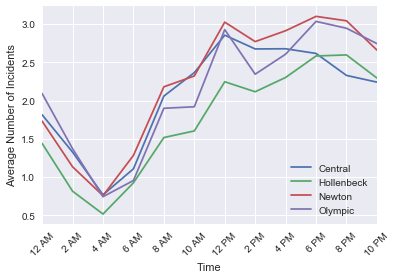

In [95]:
crime_time=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime Code Description']]
crime_time_rising=crime_time[(crime_time['Area Name']=='Central')| (crime_time['Area Name']=='Olympic')|(crime_time['Area Name']=='Newton') | (crime_time['Area Name']=='Hollenbeck')]
crime_time_rising.set_index(['Date Occurred_Time Occurred'],inplace=True)
crime_time_rising=crime_time_rising.groupby('Area Name')
crime_time_rising=crime_time_rising.resample('2H').count()
crime_time_rising.drop(columns='Area Name',inplace=True)
crime_time_rising.reset_index(inplace=True)
crime_time_rising['Time Occurred']=crime_time_rising['Date Occurred_Time Occurred'].dt.time
crime_time_rising.drop(columns='Date Occurred_Time Occurred',inplace=True)
crime_time_rising=crime_time_rising.groupby(['Time Occurred','Area Name'])['Crime Code Description'].mean().to_frame('Average')
crime_time_rising=crime_time_rising.unstack(level='Area Name')
crime_time_rising.plot()
ax=plt.gca() 
ax.set_xticks(crime_time_rising.index)
plt.xlim(crime_time_rising.index[0],crime_time_rising.index[-1])
ax.set_xticklabels(['12 AM','2 AM','4 AM','6 AM','8 AM','10 AM','12 PM','2 PM','4 PM','6 PM','8 PM','10 PM'],rotation=45)
plt.xlabel('Time')
plt.ylabel('Average Number of Incidents')
plt.legend(loc='lower right',labels=['Central','Hollenbeck','Newton','Olympic'])

H          622877
W          441442
B          287847
O          174304
Missing    166297
X           54197
A           42766
K            7999
F            2102
I             747
C             684
P             305
J             267
U             166
V             102
G              72
Z              66
S              28
D              18
L              11
-               2
Name: Victim Descent, dtype: int64


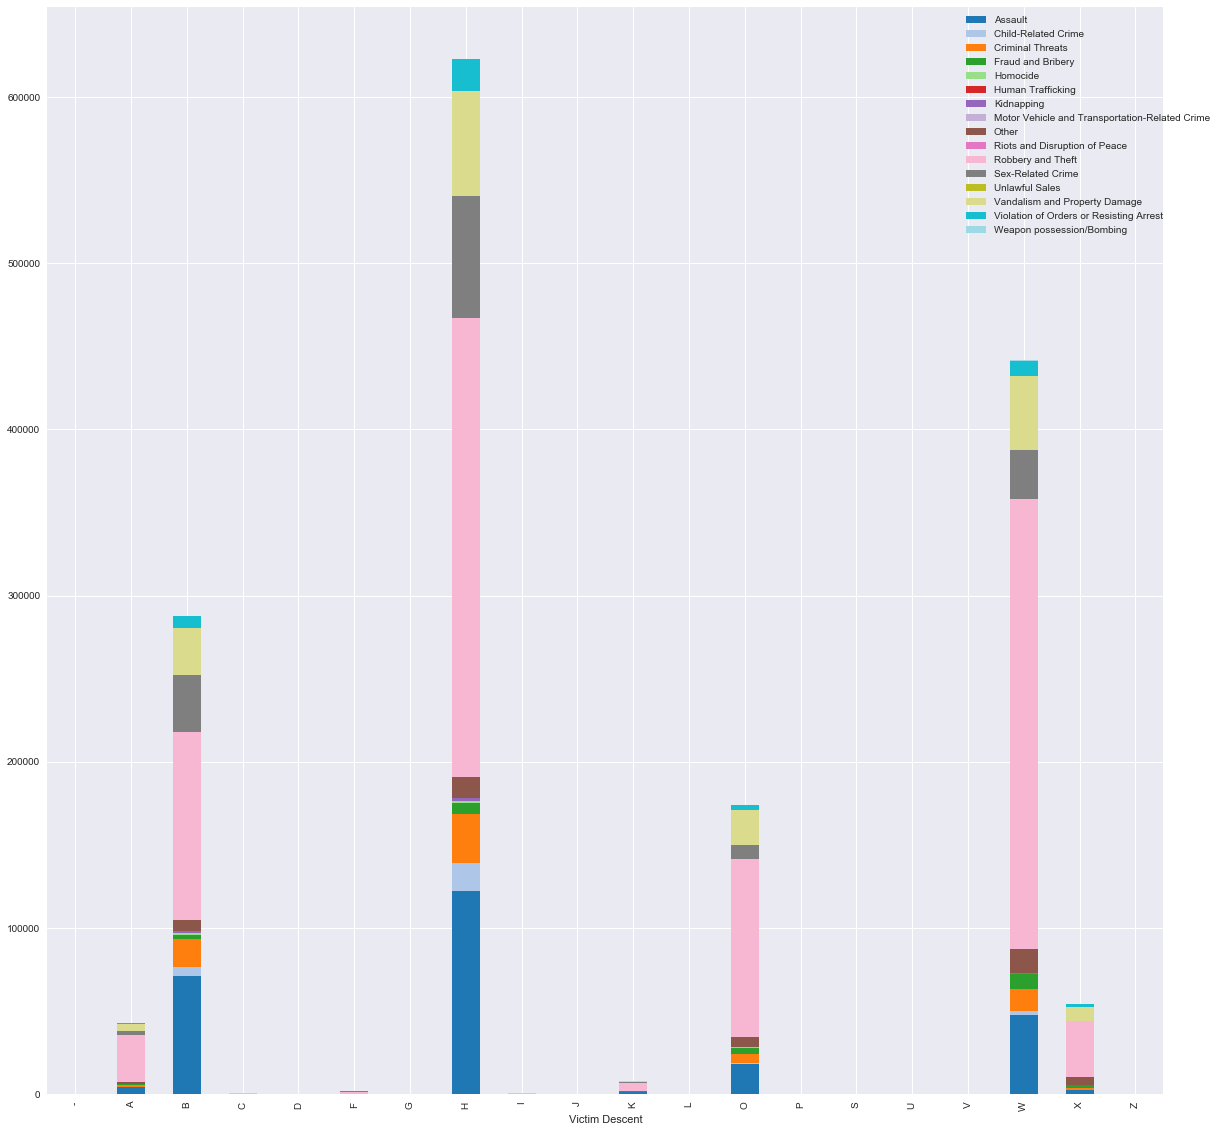

In [111]:
descent_crime=df.loc[:,['Victim Descent','Crime']]
print(descent_crime['Victim Descent'].value_counts())
descent_crime=descent_crime[descent_crime['Victim Descent']!='Missing']
descent_crime=descent_crime.groupby(['Victim Descent','Crime']).size().to_frame('Count')
descent_crime=descent_crime.unstack(level='Crime',fill_value=0)
descent_crime['Count'].plot(kind='bar',stacked=True,colormap='tab20',figsize=(20,20))
plt.legend(bbox_to_anchor=(1.05,1))